<a href="https://colab.research.google.com/github/hamm0o0d/Game-Rate-Prediction/blob/main/Game_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Note :
-deployment
-PCA
-Test script

In [ ]:
# def prepare_data(name,subtitle,User_Rating_Count,size,curr_date,orig_date,genere,language,developers,in_app_purchases,description)  :     
#         org_rd = '2/9/2016'
#         curr_rd = '31/07/2019'

#         if len(name) == 0:  # mode of xtrain word number
#             name = 'a c g'
#         if len(subtitle) == 0:
#             subtitle = 0
#         if User_Rating_Count == 0:  # mode of xtrain
#             User_Rating_Count = 5

#         if size == 0:  # median of xtrain
#             size = 67060736.0

#         if curr_date == date.today():
#             curr_date = curr_rd

#         if orig_date == date.today():  # mode of xtrain
#             orig_date = org_rd

#         if len(genere) == 0:  # this means no purchases
#             genere = 'Games'
#         else:
#             s = ''
#             for i in genere:
#                 s += i + ','
#                 genere = s

#         if len(language) == 0:  # this means no purchases
#             language = 'EN'
#         else:
#             s = ''
#             for i in language:
#                 s += i + ','
#                 language = s

#         if len(developers) == 0:  # mode of xtrain
#             developers = 'Tapps Tecnologia da Informa\xe7\xe3o Ltda.'

#         if len(in_app_purchases) == 0:  # this means no purchases
#             in_app_purchases = '0.0'
#         else:
#             s = ''
#             for i in in_app_purchases:
#                 s += i + ','
#             in_app_purchases = s

#         if len(description) == 0:
#             description = 'happy'

#         return name,subtitle,User_Rating_Count,size,curr_date,orig_date,genere,language,developers,in_app_purchases,description

# import libraries, load data and encode rate

In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.1 MB/s eta 0:00:00


In [ ]:
pip install aiohttp


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 15.7 MB/s eta 0:00:00


In [ ]:
import numpy as np # for numerical operations
import pandas as pd # for handling input data
import matplotlib.pyplot as plt # for data visualization 
import seaborn as sns # for data visualization 
import plotly.express as px

import category_encoders as ce
import cv2
from sklearn.linear_model import Ridge, Lasso,LinearRegression, LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_classif
from sklearn.preprocessing import MultiLabelBinarizer,OneHotEncoder,PolynomialFeatures,StandardScaler,LabelEncoder , OrdinalEncoder
from sklearn.metrics import classification_report, fbeta_score, make_scorer, r2_score,mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_predict, GridSearchCV, KFold, train_test_split
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import joblib
import nltk
from nltk.tokenize import  word_tokenize,sent_tokenize 
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tag import pos_tag
from nltk.corpus import stopwords, wordnet
from sklearn.feature_extraction.text import CountVectorizer
import re
from sklearn.neighbors import KNeighborsClassifier
import requests
import pickle
import urllib.request
import time
import statistics
import math
from scipy import stats
from google.colab import files
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,StackingClassifier
from datetime import datetime




In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
data=pd.read_csv('/content/games-classification-dataset.csv')
# va=pd.read_csv('/content/visual_appeal_score.csv')


# drop duplicates
data.drop_duplicates(inplace=True)
# data['visual_appeal']=va.values
print(data.shape)
data

(5171, 18)


,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Rate
0,https://apps.apple.com/us/app/heir-of-light/id...,1264483706,HEIR OF LIGHT,Dark Fantasy RPG,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,982,0.00,"29.99, 19.99, 9.99, 29.99, 29.99, 8.99, 4.99, ...","A Dark Fantasy, Collectible RPG\n\nDarkness ha...",GAMEVIL Inc.,12+,"EN, FR, DE, JA, KO, ZH, ES, TH, ZH, VI",894489600,Games,"Games, Role Playing, Strategy",6/3/2018,31/07/2019,Intermediate
1,https://apps.apple.com/us/app/endgame-eurasia/...,607705356,Endgame:Eurasia,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,19,0.00,NaN,"""This interactive experience is an exploration...",Auroch Digital Ltd,12+,EN,116407296,Games,"Games, Simulation, Strategy, News",21/03/2013,28/06/2017,Intermediate
2,https://apps.apple.com/us/app/free-solitaire/i...,627491527,Free Solitaire+,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,14,0.00,NaN,Same Solitaire game with classic Solitaire run...,Chen Zhong Yuan,4+,"EN, ZH",50647040,Games,"Games, Strategy, Entertainment, Card",4/4/2013,21/04/2015,High
3,https://apps.apple.com/us/app/draft-trainer/id...,430252596,Draft Trainer,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,88,1.99,NaN,** Discounted for a limited time **\n\nEver wo...,"GG Wizards, LLC",9+,EN,28120064,Games,"Games, Utilities, Card, Strategy",26/05/2011,23/07/2019,Intermediate
4,https://apps.apple.com/us/app/rogue-knight-inf...,1115082819,Rogue Knight: Infested Lands,Tactical roguelike w/ stealth,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,13,3.99,NaN,Fight or sneak your way through hordes of mons...,Luis Regueira,12+,EN,39915520,Games,"Games, Role Playing, Strategy",19/05/2017,6/2/2019,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5209,https://apps.apple.com/us/app/plague-inc/id525...,525818839,Plague Inc.,Can you Infect the World?,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,205014,0.99,"1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 2.99, 7.99...","""Can you infect the world? Plague Inc. is a un...",Ndemic Creations,12+,"EN, FR, DE, IT, JA, KO, NB, PL, PT, RU, ZH, ES...",118793216,Games,"Games, Strategy, Simulation",26/05/2012,8/2/2019,High
5210,https://apps.apple.com/us/app/jeans-club/id945...,945975522,"""Jean's Club""","""Let's run a attractive club.""",https://is1-ssl.mzstatic.com/image/thumb/Purpl...,252,0.00,"2.99, 4.99, 1.99, 2.99, 5.99, 9.99, 11.99, 19.99","""Jean start new business, managing club after ...","AFEEL, Inc.",4+,"EN, JA, KO",79267840,Games,"Games, Simulation, Strategy, Entertainment",11/1/2015,16/04/2018,High
5211,https://apps.apple.com/us/app/train-game-assis...,550919302,Train Game Assistant,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,12,0.00,NaN,"""Train Game Assistant supplements the board ga...",Stasis Software LLC,4+,EN,19513344,Utilities,"Utilities, Games, Board, Strategy",16/08/2012,21/02/2017,High
5212,https://apps.apple.com/us/app/independence-day...,1086647459,Independence Day Resurgence: Battle Heroes,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,578,0.00,"9.99, 1.99, 4.99, 19.99, 4.99, 4.99, 4.99, 9.9...","""Earth stands united!\n\nJoin the combat ranks...",ZEN Studios Ltd.,9+,EN,275680256,Games,"Games, Strategy, Role Playing",8/6/2016,30/01/2017,Intermediate


In [ ]:
ll=[]
if len(ll)==0:
  print(1)

1


# predefined function 

## number of words

In [ ]:
def calculate_name_words_number(data):
  y=data['Name'].str.replace('[^\w\s]', '').str.split(':| ').apply(lambda x: [str(s) for s in x])
  listy=[]
  for item in y:
    listy.append(len(item)+1)
  return listy

In [ ]:
def calculate_subtitle_words_number(data):
  mydata=data['Subtitle'].fillna('one')
  y=mydata.str.replace('[^\w\s]', '', regex=True).str.split(':| ').apply(lambda x: [str(s) for s in x])
  listy=[]
  one=['one']
  for item in y:
    if item == one:
      listy.append(len(item))
    else:
            listy.append(len(item)+1)
  return listy

## price

In [ ]:
def has_price_feature(data):
  lsty=[]
  for item in data['Price']:
    if item == 0 :
      lsty.append(0)
    else:
      lsty.append(1)
  return lsty

## encode

In [ ]:
def encode_rate(data):
  return data['Rate'].replace('Low',0).replace('Intermediate',1).replace('High',2)


In [ ]:
def encode_subtitle(data):
  listy=[]
  mydata=data['Subtitle'].fillna(-11)
  for row in mydata:
    if row == -11 :
      listy.append(0)
    else:
      listy.append(1)

  return listy

In [ ]:
def encode_age_rating(data):

    data['Age Rating']=data['Age Rating'].apply(lambda x : x.replace("+", ""))
    data['Age Rating']=data['Age Rating'].apply(lambda x : int(x))
    return data['Age Rating']
    

## outlier

In [ ]:
def check_outliar(data):
  # Calculate the interquartile range (IQR) of the data
  Q1 = data.quantile(0.25)
  Q3 =data.quantile(0.75)
  IQR = Q3 - Q1

  # Determine the lower and upper bounds for outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = data[(data < lower_bound) | (data > upper_bound)]

  # Print the outliers
  return (len(outliers))

In [ ]:
def handle_outlier(data):
  # Create a sample dataset
  thedata = data

  # Set the Winsorization percentiles
  pct = 0.20

  # Calculate the percentile values
  low_val = np.percentile(thedata, pct * 100)
  high_val = np.percentile(thedata, (1 - pct) * 100)

  # Replace the extreme values with the percentile values
  thedata[data < low_val] = low_val
  thedata[data > high_val] = high_val

  # Print the transformed data
  # print(data)
  data=thedata

## visual_appeal

In [ ]:
def calc_appeal_score(url):
    # time.sleep(1)
    if pd.isnull(url) :
      return None
      
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")

    image = cv2.imdecode(image, cv2.IMREAD_COLOR)

    # Resize image
    target_size = (256, 256)  # specify target size

    resized_image = cv2.resize(image, target_size)

    # Convert image to grayscale
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

    # Compute color histogram
    hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

    # Normalize histogram
    hist /= hist.sum()

    # Calculate visual appeal score based on histogram
    visual_appeal_score = sum([hist[i] * (i / 256) for i in range(256)])
    return visual_appeal_score
    # Print visual appeal score
    # print("Visual Appeal Score:", visual_appeal_score)

In [ ]:
def icon_url_feature_eng(data):
  mylist=data['Icon URL']
  mylist=mylist.apply(calc_appeal_score)
  data['visual_appeal']=mylist

In [ ]:
def convert_visual_appeal(data):
  listo=data['visual_appeal']
  listo.fillna('[0.0]',inplace=True)
  listo=listo.apply(lambda x : str(x))
  listo=listo.apply(lambda x : x.replace("[", "").replace("]", ""))
  listo=listo.apply(lambda x : float(x))
  mymean=0.4856552140087041 # mean visual_appeal for xtrain
  listo = [mymean if x == 0 else x for x in listo]
  return listo

## url 

In [ ]:
def check_url(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            return True
        else:
            return False
    except:
        return False

In [ ]:
def check_url_feature(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            return 1
        else:
            return 0
    except:
        return 0


## in_app_purchases

In [ ]:
def purchases_or_not_feature(data):
  lsty=[]
  for item in data['In-app Purchases']:
    if item =='0.0':
      lsty.append(0)
    else:
      lsty.append(1)
  return lsty


In [ ]:
def in_app_purchase_eng(data):
  data['In-app Purchases']=data['In-app Purchases'].str.split(',').apply(lambda x: [float(s) for s in x])
  meanc=[]
  medianc=[]
  maxc=[]
  minc=[]
  for row in data['In-app Purchases']:
    meanc.append(np.mean(row))
    medianc.append(np.median(row))
    maxc.append(np.max(row))
    minc.append(np.min(row))
  return meanc,medianc,maxc,minc

## drop

In [ ]:
def drop_col(data):
  droped=['Description','Developer','ID','In-app Purchases','Subtitle','URL','Languages','Icon URL','Primary Genre','Genres','Original Release Date','Current Version Release Date']
  data.drop(columns=droped,inplace=True)

## dates

In [ ]:
def convert_date_to_numeric_timestamp(dates):
    timestamps = []
    for date in dates:
        dt_obj = datetime.strptime(date, '%d/%m/%Y')
        timestamp = datetime.timestamp(dt_obj)
        timestamps.append(timestamp)
    return timestamps

In [ ]:
def convert_date(data):
  data=data.apply(pd.Timestamp)
  day=data.dt.day
  month=data.dt.month
  year=data.dt.year

  return day,month,year

In [ ]:
def calculate_app_ages(data):
  cday,cmonth,cyear=convert_date(data['Current Version Release Date'])
  oday,omonth,oyear=convert_date(data['Original Release Date'])
  cday=list(cday)
  cmonth=list(cmonth)
  cyear=list(cyear)
  oday=list(oday)
  omonth=list(omonth)
  oyear=list(oyear)

  days=[]
  months=[]
  years=[]
  testc,testo=0,0
  for i in range(len(cyear)):
    tmp_day=((datetime(cyear[i], cmonth[i], cday[i]))-(datetime(oyear[i], omonth[i], oday[i]))).days
    if tmp_day < 0:
      tmp_day= tmp_day * (- 1.0) 
    tmp_month=tmp_day/30.5
    tmp_month = "{:.{prec}f}".format(tmp_month, prec=3)
    tmp_month=float(tmp_month)
    if tmp_month < 0:
      tmp_month= tmp_month * (- 1.0)

    tmp_year=tmp_day/365.25
    tmp_year="{:.{prec}f}".format(tmp_year, prec=3)
    tmp_year=float(tmp_year)
    if tmp_year < 0:
      tmp_year= tmp_year * (- 1.0)

    days.append(tmp_day)
    months.append(tmp_month)
    years.append(tmp_year)

  return years, months,days

## App count and density

In [ ]:
def dev_app_count_col(data):
  listo=[]
  for dev in data['Developer']:

    try :
      listo.append(developer_apps_count.loc[dev,'App Count'])
    except:
      listo.append(1)

  data['dev_apps_count']=listo


In [ ]:
def calc_density(data):
  data['density']=data['User Rating Count']/data['Size']

## description -> canceled

In [ ]:
def description_features(data):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    punc = '''!()-[]{};:'"\,<>/?@#$%^&*_~'''


    Preprocessed_Description_before_stopwords=[]
    Preprocessed_Description_after_stopwords=[]

    num_of_words_before_remove_stopwords =[]
    num_of_words_after_remove_stopwords =[]


    percentage_list=[]
    lemmatizer=WordNetLemmatizer()
    for index,row in data.iterrows():
        sentence=row['Description']
    #cleaning the Descriptions from newline char and the punctuation and links and the numbers and garbadge data
        sentence = sentence.replace("\\n","\n")
        sentence = sentence.replace("\n", " ")
        sentence = re.sub(r'u[\da-f]{4}', '', sentence)
        sentence = re.sub(r'http\S+', '', sentence)
        sentence = re.sub(r'\d+', '', sentence)
        sentence_without_punc = ''.join([ele for ele in sentence if ele not in punc])
    #Apply the Word Tokanization
        word_tokens=word_tokenize(sentence_without_punc)
    #Removing the . char from the Tokens
        for item in word_tokens:
            if '.' in item:
                word_tokens.remove(item)

    #Count the number of words before removing the stopwords
        num_of_words_before_remove_stopwords.append(len(word_tokens)) 


    #Append All Preprocessed tokens before removing stop words in a new list called Preprocessed_Description
        Preprocessed_Description_before_stopwords.append(word_tokens)


    #Removing the StopWords from tokens
        tokens_without_stopwords = [word for word in word_tokens if word.casefold() not in stop_words]

    #Count the number of words after removing the stopwords
        num_of_words_after_remove_stopwords.append(len(tokens_without_stopwords))

    #Applying the Lemmatizations on the tokens
        lemmatized_words = [lemmatizer.lemmatize(word,pos='v') for word in tokens_without_stopwords]

    #Append All Preprocessed tokens after removing stop words in a new list called Preprocessed_Description
        Preprocessed_Description_after_stopwords.append(lemmatized_words)
    #Putting the defualt value (1) as this description does not have any words and measure the precentage between the number of words after removing the stopwords and between the words befor removing the stopwords
    for i in range(0,len(num_of_words_after_remove_stopwords)):
        if (num_of_words_after_remove_stopwords[i]==0 or num_of_words_before_remove_stopwords[i]==0):
            num_of_words_after_remove_stopwords[i]= num_of_words_after_remove_stopwords[i]+1
            num_of_words_before_remove_stopwords[i]= num_of_words_before_remove_stopwords[i]+1
        percentage_list.append((num_of_words_after_remove_stopwords[i]/num_of_words_before_remove_stopwords[i]))
      #data.loc[index,'Description']=preprocessing_Des 
    data['length_of_all_discription']=num_of_words_before_remove_stopwords
    data['length_of_discription_summary']=num_of_words_after_remove_stopwords
    data['discription_summary_percent']=percentage_list


## fill nulls

In [ ]:
def fill_nulls(data):
  org_rd='2/9/2016'
  curr_rd='31/07/2019'

  if data['Languages'].isna().sum()>0:
     data['Languages'].fillna('EN',inplace=True)
    
  if data['Genres'].isna().sum()>0: # mode of xtrain
     data['Genres'].fillna('Games, Strategy, Puzzle, Simulation, Action',inplace=True)

  if data['Primary Genre'].isna().sum()>0: #mode of xtrain
     data['Primary Genre'].fillna('Games',inplace=True)

  if data['Size'].isna().sum()>0: #median of xtrain
     data['Size'].fillna(67060736.0,inplace=True)

  if data['Age Rating'].isna().sum()>0: #mode of xtrain
     data['Age Rating'].fillna('4+',inplace=True)

  if data['Developer'].isna().sum()>0: #mode of xtrain 
     data['Developer'].fillna('Tapps Tecnologia da Informa\xe7\xe3o Ltda.',inplace=True)

  if data['In-app Purchases'].isna().sum()>0: # this means no purchases 
     data['In-app Purchases'].fillna('0.0',inplace=True)

  if data['Price'].isna().sum()>0:  #mode of xtrain 
     data['Price'].fillna(0.00,inplace=True)

  if data['User Rating Count'].isna().sum()>0: #mode of xtrain 
     data['User Rating Count'].fillna(5,inplace=True)

  if data['Original Release Date'].isna().sum()>0 : #mode of xtrain 
     data['Original Release Date'].fillna(org_rd,inplace=True)

  if data['Current Version Release Date'].isna().sum()>0 : #mode of xtrain 
     data['Current Version Release Date'].fillna(curr_rd,inplace=True)

## Description

In [ ]:
def Cleaning_Descriptions(sentence):
    punc = '''!()-[]{};:'"\,<>/?@#$%^&*_~'''
    sentence = sentence.replace("\\n","\n")
    sentence = sentence.replace("\n"," ")
    sentence = re.sub(r'u[\da-f]{4}','', sentence)
    sentence = re.sub(r'http\S+','', sentence)
    sentence = re.sub(r'\d+','', sentence)
    return ''.join([ele for ele in sentence if ele not in punc])


In [ ]:
def remove_stopwords(text):
    word_tokens=word_tokenize(text)
    return ' '.join([word for word in word_tokens if word not in stop_words])

In [ ]:
def remove_additional_space(text):
    text=re.sub('\s+',' ',text)
    return text

In [ ]:
def Summarization(text):
    stopWords = set(stopwords.words("english")) 
    words = word_tokenize(text) 
    freqTable = dict() 
    for word in words: 
        if word in stopWords: 
            continue
        if word in freqTable: 
            freqTable[word] += 1
        else: 
            freqTable[word] = 1
    sentences = sent_tokenize(text) 
    sentenceValue = dict() 

    for sentence in sentences: 
        for word, freq in freqTable.items(): 
            if word in sentence.lower(): 
                if sentence in sentenceValue: 
                    sentenceValue[sentence] += freq 
                else: 
                    sentenceValue[sentence] = freq 
    sumValues = 0
    for sentence in sentenceValue: 
        sumValues += sentenceValue[sentence] 
    average = int(sumValues / (len(sentenceValue)+1))
    summary = '' 
    for sentence in sentences: 
        if (sentence in sentenceValue) and (sentenceValue[sentence] > (1.2 * average)): 
            summary += " " + sentence 
    return summary

In [ ]:
stemmer=PorterStemmer()
def stemm_words(text):
    word_tokens=word_tokenize(text)
    return " ".join([stemmer.stem(word) for word in word_tokens])

In [ ]:
lemmatizer = WordNetLemmatizer()
wordnet_map={"N":wordnet.NOUN,"V":wordnet.VERB,"J":wordnet.ADJ,"R":wordnet.ADV}
def lemmatize_words(text):
    word_tokens=word_tokenize(text)
    pos_text=pos_tag(word_tokens)
    return " ".join([lemmatizer.lemmatize(word,wordnet_map.get(pos[0],wordnet.NOUN)) for word,pos in pos_text])

# analyze data

In [ ]:
data.describe()

,ID,User Rating Count,Price,Size
count,5.171000e+03,5.171000e+03,5171.000000,5.171000e+03
mean,8.679823e+08,3.679335e+03,0.602746,1.380245e+08
std,2.942795e+08,4.997913e+04,2.560031,2.535259e+08
min,2.849214e+08,5.000000e+00,0.000000,2.158400e+05
25%,5.952646e+08,1.300000e+01,0.000000,2.740388e+07
50%,9.193940e+08,4.900000e+01,0.000000,6.706074e+07
75%,1.115636e+09,3.320000e+02,0.000000,1.583887e+08
max,1.341837e+09,3.032734e+06,139.990000,4.005591e+09


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5171 entries, 0 to 5213
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           5171 non-null   object 
 1   ID                            5171 non-null   int64  
 2   Name                          5171 non-null   object 
 3   Subtitle                      1454 non-null   object 
 4   Icon URL                      5171 non-null   object 
 5   User Rating Count             5171 non-null   int64  
 6   Price                         5171 non-null   float64
 7   In-app Purchases              3146 non-null   object 
 8   Description                   5171 non-null   object 
 9   Developer                     5171 non-null   object 
 10  Age Rating                    5171 non-null   object 
 11  Languages                     5160 non-null   object 
 12  Size                          5171 non-null   int64  
 13  Pri

<Axes: >

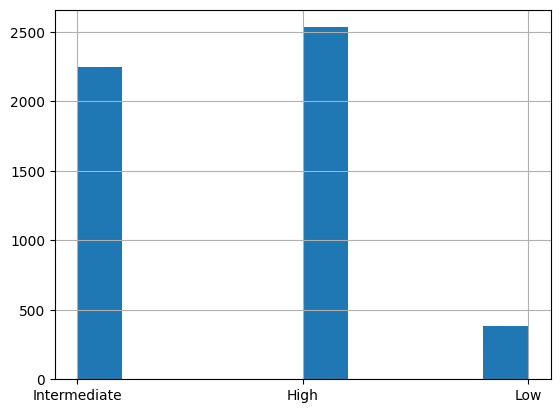

In [ ]:
data['Rate'].hist()

# encode Rate

In [ ]:
data['Rate']=encode_rate(data)
temp=data['Rate']
data.drop(columns= 'Rate',inplace=True)
data['Rate']=temp
data

,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Rate
0,https://apps.apple.com/us/app/heir-of-light/id...,1264483706,HEIR OF LIGHT,Dark Fantasy RPG,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,982,0.00,"29.99, 19.99, 9.99, 29.99, 29.99, 8.99, 4.99, ...","A Dark Fantasy, Collectible RPG\n\nDarkness ha...",GAMEVIL Inc.,12+,"EN, FR, DE, JA, KO, ZH, ES, TH, ZH, VI",894489600,Games,"Games, Role Playing, Strategy",6/3/2018,31/07/2019,1
1,https://apps.apple.com/us/app/endgame-eurasia/...,607705356,Endgame:Eurasia,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,19,0.00,NaN,"""This interactive experience is an exploration...",Auroch Digital Ltd,12+,EN,116407296,Games,"Games, Simulation, Strategy, News",21/03/2013,28/06/2017,1
2,https://apps.apple.com/us/app/free-solitaire/i...,627491527,Free Solitaire+,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,14,0.00,NaN,Same Solitaire game with classic Solitaire run...,Chen Zhong Yuan,4+,"EN, ZH",50647040,Games,"Games, Strategy, Entertainment, Card",4/4/2013,21/04/2015,2
3,https://apps.apple.com/us/app/draft-trainer/id...,430252596,Draft Trainer,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,88,1.99,NaN,** Discounted for a limited time **\n\nEver wo...,"GG Wizards, LLC",9+,EN,28120064,Games,"Games, Utilities, Card, Strategy",26/05/2011,23/07/2019,1
4,https://apps.apple.com/us/app/rogue-knight-inf...,1115082819,Rogue Knight: Infested Lands,Tactical roguelike w/ stealth,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,13,3.99,NaN,Fight or sneak your way through hordes of mons...,Luis Regueira,12+,EN,39915520,Games,"Games, Role Playing, Strategy",19/05/2017,6/2/2019,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5209,https://apps.apple.com/us/app/plague-inc/id525...,525818839,Plague Inc.,Can you Infect the World?,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,205014,0.99,"1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 2.99, 7.99...","""Can you infect the world? Plague Inc. is a un...",Ndemic Creations,12+,"EN, FR, DE, IT, JA, KO, NB, PL, PT, RU, ZH, ES...",118793216,Games,"Games, Strategy, Simulation",26/05/2012,8/2/2019,2
5210,https://apps.apple.com/us/app/jeans-club/id945...,945975522,"""Jean's Club""","""Let's run a attractive club.""",https://is1-ssl.mzstatic.com/image/thumb/Purpl...,252,0.00,"2.99, 4.99, 1.99, 2.99, 5.99, 9.99, 11.99, 19.99","""Jean start new business, managing club after ...","AFEEL, Inc.",4+,"EN, JA, KO",79267840,Games,"Games, Simulation, Strategy, Entertainment",11/1/2015,16/04/2018,2
5211,https://apps.apple.com/us/app/train-game-assis...,550919302,Train Game Assistant,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,12,0.00,NaN,"""Train Game Assistant supplements the board ga...",Stasis Software LLC,4+,EN,19513344,Utilities,"Utilities, Games, Board, Strategy",16/08/2012,21/02/2017,2
5212,https://apps.apple.com/us/app/independence-day...,1086647459,Independence Day Resurgence: Battle Heroes,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,578,0.00,"9.99, 1.99, 4.99, 19.99, 4.99, 4.99, 4.99, 9.9...","""Earth stands united!\n\nJoin the combat ranks...",ZEN Studios Ltd.,9+,EN,275680256,Games,"Games, Strategy, Role Playing",8/6/2016,30/01/2017,1


# convert visual_appeal

In [ ]:
# convert visual_appeal to float and filling null values with mean 
# data['visual_appeal']=convert_visual_appeal(data)


# fill nulls 

In [ ]:
data['In-app Purchases']

0       29.99, 19.99, 9.99, 29.99, 29.99, 8.99, 4.99, ...
1                                                     NaN
2                                                     NaN
3                                                     NaN
4                                                     NaN
                              ...                        
5209    1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 2.99, 7.99...
5210     2.99, 4.99, 1.99, 2.99, 5.99, 9.99, 11.99, 19.99
5211                                                  NaN
5212    9.99, 1.99, 4.99, 19.99, 4.99, 4.99, 4.99, 9.9...
5213           0.99, 1.99, 0.99, 4.99, 9.99, 19.99, 49.99
Name: In-app Purchases, Length: 5171, dtype: object

In [ ]:
data['In-app Purchases'].fillna('0.0',inplace=True)
data.Languages=data.Languages.fillna('EN')

# **feature engineering befor splitting**



## has purchases 

In [ ]:
data['has_purchases']=purchases_or_not_feature(data)



## game link work

In [ ]:
# with open('/content/game_working_urls.pkl', 'rb') as f:
#     # Load the pickled data into a Python object
#     my_list = pickle.load(f)
# data['link_work']=my_list

## encode Age Rating

In [ ]:
data['Age Rating']=encode_age_rating(data)
data['Age Rating']

0       12
1       12
2        4
3        9
4       12
        ..
5209    12
5210     4
5211     4
5212     9
5213     4
Name: Age Rating, Length: 5171, dtype: int64

## apply feature engineering on in-app-purchases 

In [ ]:
data['mean Purchases'],data['meedian Purchases'],data['max Purchases'],data['min Purchases']=in_app_purchase_eng(data)


## calculate number of words per game name

In [ ]:
# calculate number of words per game name
data['Name']=calculate_name_words_number(data)


<ipython-input-10-6149ac8e48d2>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  y=data['Name'].str.replace('[^\w\s]', '').str.split(':| ').apply(lambda x: [str(s) for s in x])


## calculate density 

In [ ]:
# calculate density -> User Rating Count/ game Size
calc_density(data)

## convert date to numeric time stamp

In [ ]:
data['Curr_datestamp']=convert_date_to_numeric_timestamp(data['Current Version Release Date'])
data['orig_datestamp']=convert_date_to_numeric_timestamp(data['Original Release Date'])
data

,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,...,Current Version Release Date,Rate,has_purchases,mean Purchases,meedian Purchases,max Purchases,min Purchases,density,Curr_datestamp,orig_datestamp
0,https://apps.apple.com/us/app/heir-of-light/id...,1264483706,4,Dark Fantasy RPG,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,982,0.00,"[29.99, 19.99, 9.99, 29.99, 29.99, 8.99, 4.99,...","A Dark Fantasy, Collectible RPG\n\nDarkness ha...",GAMEVIL Inc.,...,31/07/2019,1,1,19.240000,17.49,29.99,4.99,1.097833e-06,1.564531e+09,1.520294e+09
1,https://apps.apple.com/us/app/endgame-eurasia/...,607705356,2,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,19,0.00,[0.0],"""This interactive experience is an exploration...",Auroch Digital Ltd,...,28/06/2017,1,0,0.000000,0.00,0.00,0.00,1.632200e-07,1.498608e+09,1.363824e+09
2,https://apps.apple.com/us/app/free-solitaire/i...,627491527,3,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,14,0.00,[0.0],Same Solitaire game with classic Solitaire run...,Chen Zhong Yuan,...,21/04/2015,2,0,0.000000,0.00,0.00,0.00,2.764229e-07,1.429574e+09,1.365034e+09
3,https://apps.apple.com/us/app/draft-trainer/id...,430252596,3,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,88,1.99,[0.0],** Discounted for a limited time **\n\nEver wo...,"GG Wizards, LLC",...,23/07/2019,1,0,0.000000,0.00,0.00,0.00,3.129438e-06,1.563840e+09,1.306368e+09
4,https://apps.apple.com/us/app/rogue-knight-inf...,1115082819,5,Tactical roguelike w/ stealth,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,13,3.99,[0.0],Fight or sneak your way through hordes of mons...,Luis Regueira,...,6/2/2019,2,0,0.000000,0.00,0.00,0.00,3.256879e-07,1.549411e+09,1.495152e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5209,https://apps.apple.com/us/app/plague-inc/id525...,525818839,3,Can you Infect the World?,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,205014,0.99,"[1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 2.99, 7.9...","""Can you infect the world? Plague Inc. is a un...",Ndemic Creations,...,8/2/2019,2,1,3.847143,1.99,12.99,0.99,1.725806e-03,1.549584e+09,1.337990e+09
5210,https://apps.apple.com/us/app/jeans-club/id945...,945975522,3,"""Let's run a attractive club.""",https://is1-ssl.mzstatic.com/image/thumb/Purpl...,252,0.00,"[2.99, 4.99, 1.99, 2.99, 5.99, 9.99, 11.99, 19...","""Jean start new business, managing club after ...","AFEEL, Inc.",...,16/04/2018,2,1,7.615000,5.49,19.99,1.99,3.179095e-06,1.523837e+09,1.420934e+09
5211,https://apps.apple.com/us/app/train-game-assis...,550919302,4,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,12,0.00,[0.0],"""Train Game Assistant supplements the board ga...",Stasis Software LLC,...,21/02/2017,2,0,0.000000,0.00,0.00,0.00,6.149638e-07,1.487635e+09,1.345075e+09
5212,https://apps.apple.com/us/app/independence-day...,1086647459,6,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,578,0.00,"[9.99, 1.99, 4.99, 19.99, 4.99, 4.99, 4.99, 9....","""Earth stands united!\n\nJoin the combat ranks...",ZEN Studios Ltd.,...,30/01/2017,1,1,12.190000,7.49,49.99,1.99,2.096632e-06,1.485734e+09,1.465344e+09


## encode dates to year,month,day

In [ ]:
data["orgDay"],data["orgMonth"],data["orgYear"]=convert_date(data["Original Release Date"])
data["currDay"],data["currMonth"],data["currYear"]=convert_date(data["Current Version Release Date"])


<ipython-input-27-1b575e1ae60e>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data=data.apply(pd.Timestamp)
<ipython-input-27-1b575e1ae60e>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data=data.apply(pd.Timestamp)


## calculate age of the app from the date 

In [ ]:
data['app age in years'],data['app age in months'],data['app age in days']=calculate_app_ages(data)
data[['app age in years','app age in months','app age in days']]


<ipython-input-27-1b575e1ae60e>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data=data.apply(pd.Timestamp)


,app age in years,app age in months,app age in days
0,1.158,13.869,423.0
1,4.271,51.148,1560.0
2,2.045,24.492,747.0
3,8.159,97.705,2980.0
4,2.037,24.393,744.0
...,...,...,...
5209,7.184,86.033,2624.0
5210,2.456,29.410,897.0
5211,4.517,54.098,1650.0
5212,0.485,5.803,177.0


## has price feature

In [ ]:
data['has_price']=has_price_feature(data)


## has subtitle feature 

In [ ]:
data['has_subtitle']=encode_subtitle(data)

data['has_subtitle']

0       1
1       0
2       0
3       0
4       1
       ..
5209    1
5210    1
5211    0
5212    0
5213    0
Name: has_subtitle, Length: 5171, dtype: int64

## calculate subtitle words number 

In [ ]:
data['subtitle_words_number']=calculate_subtitle_words_number(data)


# spliting the data

In [ ]:
x=(data.drop(columns='Rate'))
y=(data['Rate'])
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=300,shuffle=True)
# xtest.drop(columns=['visual_appeal'],inplace=True)
ytrain=ytrain.reset_index(level=0, drop=True)
ytest=ytest.reset_index(level=0, drop=True)

print(data.shape)
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)


(5171, 38)
(4136, 37) (4136,)
(1035, 37) (1035,)


# feature engineering after splitting

## define dev_apps_count & calculate number of apps for every developer 

In [ ]:
# define dev_apps_count
developer_apps_count = xtrain['Developer'].value_counts().reset_index()
developer_apps_count.columns = ['Developer', 'App Count']
developer_apps_count=developer_apps_count.set_index('Developer')
developer_apps_count

,App Count
Developer,
Tapps Tecnologia da Informa\xe7\xe3o Ltda.,69
Detention Apps,29
EASY Inc.,22
Qumaron,21
HexWar Games Ltd,20
...,...
Logick LLC,1
Plarium LLC,1
Fowers Games Inc.,1


In [ ]:
# with open('developer_apps_count.pkl', 'wb') as f:
#     # use pickle.dump() to write the object to the file
#     pickle.dump(developer_apps_count, f)

In [ ]:
# number of app for developers to xtrain and xtest
dev_app_count_col(xtrain)
dev_app_count_col(xtest)

# handel categorical features 

## spltitting xtrain & xtest


In [ ]:

xtrain["Languages"]=xtrain["Languages"].str.split(', ')
xtrain["Genres"]=xtrain["Genres"].str.split(', ')

In [ ]:
xtest["Languages"]=xtest["Languages"].str.split(', ')
xtest["Genres"]=xtest["Genres"].str.split(', ')

## encode language for xtrain and xtest


In [ ]:
lang_mlb= MultiLabelBinarizer()
xtrain_expandedLabelData = lang_mlb.fit_transform(xtrain.Languages)

xtrain_languages_df = pd.DataFrame(xtrain_expandedLabelData, columns=lang_mlb.classes_)
xtrain_languages_df

,AF,AM,AR,AS,AY,AZ,BE,BG,BN,BO,...,TO,TR,TT,UG,UK,UR,UZ,VI,YI,ZH
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
xtest_expandedLabelData = lang_mlb.transform(xtest.Languages)
xtest_languages_df = pd.DataFrame(xtest_expandedLabelData, columns=lang_mlb.classes_)
xtest_languages_df

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['ZU'] will be ignored
  warnings.warn(


,AF,AM,AR,AS,AY,AZ,BE,BG,BN,BO,...,TO,TR,TT,UG,UK,UR,UZ,VI,YI,ZH
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1031,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## encode genres for xtrain and xtest


In [ ]:
Genres_mlb = MultiLabelBinarizer()
xtrain_expandedLabelData = Genres_mlb.fit_transform(xtrain.Genres)
xtrain_genres_df = pd.DataFrame(xtrain_expandedLabelData, columns=Genres_mlb.classes_)
xtrain_genres_df.columns

Index(['Action', 'Adventure', 'Board', 'Books', 'Business', 'Card', 'Casino',
       'Casual', 'Education', 'Entertainment', 'Family', 'Finance',
       'Food & Drink', 'Games', 'Gaming', 'Health & Fitness', 'Kids & Family',
       'Lifestyle', 'Medical', 'Music', 'Navigation', 'News', 'Photo & Video',
       'Productivity', 'Puzzle', 'Racing', 'Reference', 'Role Playing',
       'Shopping', 'Simulation', 'Social Networking', 'Sports', 'Stickers',
       'Strategy', 'Travel', 'Trivia', 'Utilities', 'Word'],
      dtype='object')

In [ ]:
xtest_expandedLabelData = Genres_mlb.transform(xtest.Genres)
xtest_genres_df = pd.DataFrame(xtest_expandedLabelData, columns=Genres_mlb.classes_)
xtest_genres_df

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['Emoji & Expressions'] will be ignored
  warnings.warn(


,Action,Adventure,Board,Books,Business,Card,Casino,Casual,Education,Entertainment,...,Shopping,Simulation,Social Networking,Sports,Stickers,Strategy,Travel,Trivia,Utilities,Word
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1031,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1033,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


## encode primary genre for xtrain and xtest

In [ ]:
# encode primary genre 
cat_encoder = OneHotEncoder(handle_unknown='ignore')
# fit and transform the "Primary Genre" column
ohe_Primary_Genre_xtrain = cat_encoder.fit_transform(xtrain[['Primary Genre']])

# create a new DataFrame with the one-hot encoded columns
encoded_PrimaryGenre_xtrain = pd.DataFrame(ohe_Primary_Genre_xtrain.toarray(), columns=cat_encoder.categories_)

# df_encoded = df_encoded.reset_index(level=1)
encoded_PrimaryGenre_xtrain = encoded_PrimaryGenre_xtrain.reset_index(level=0, drop=True)

# map the column index to a string
encoded_PrimaryGenre_xtrain.columns = encoded_PrimaryGenre_xtrain.columns.map(lambda x: x[0])

encoded_PrimaryGenre_xtrain


,Book,Business,Education,Entertainment,Finance,Food & Drink,Games,Health & Fitness,Lifestyle,Medical,Music,News,Productivity,Reference,Shopping,Social Networking,Sports,Stickers,Utilities
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4131,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4132,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4133,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4134,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# fit and transform the "Primary Genre" column
ohe_Primary_Genre_xtest = cat_encoder.transform(xtest[['Primary Genre']])

# create a new DataFrame with the one-hot encoded columns
encoded_PrimaryGenre_xtest = pd.DataFrame(ohe_Primary_Genre_xtest.toarray(), columns=cat_encoder.categories_)

# df_encoded = df_encoded.reset_index(level=1)
encoded_PrimaryGenre_xtest = encoded_PrimaryGenre_xtest.reset_index(level=0, drop=True)

# map the column index to a string
encoded_PrimaryGenre_xtest.columns = encoded_PrimaryGenre_xtest.columns.map(lambda x: x[0])


encoded_PrimaryGenre_xtest


,Book,Business,Education,Entertainment,Finance,Food & Drink,Games,Health & Fitness,Lifestyle,Medical,Music,News,Productivity,Reference,Shopping,Social Networking,Sports,Stickers,Utilities
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1031,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1032,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1033,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## concatenating genres & language with xtrain and xtest

In [ ]:
xtrain=xtrain.reset_index(level=0, drop=True)
xtrain=pd.concat([xtrain, xtrain_genres_df,xtrain_languages_df], axis=1)
xtrain.shape

(4136, 188)

In [ ]:
xtest=xtest.reset_index(level=0, drop=True)
xtest=pd.concat([xtest, xtest_genres_df,xtest_languages_df], axis=1)
xtest.shape

(1035, 188)

## adding unexisted primary genre as features and summing existed one in xtrain and xtest

In [ ]:
for item in (encoded_PrimaryGenre_xtrain.columns):
  if item in xtrain_genres_df:
    listy=[]
    for i in range(len(xtrain)):
      listy.append(xtrain[item][i]+ encoded_PrimaryGenre_xtrain[item][i])    
   
    xtrain[item]=listy 
  else:
    xtrain[item]=encoded_PrimaryGenre_xtrain[item].values
xtrain.shape

(4136, 189)

In [ ]:
for item in (encoded_PrimaryGenre_xtest.columns):
  if item in xtest_genres_df:
    listy=[]
    for i in range(len(xtest)):
      listy.append(xtest[item][i]+ encoded_PrimaryGenre_xtest[item][i])    
   
    xtest[item]=listy 
  else:
    xtest[item]=encoded_PrimaryGenre_xtest[item].values
xtest.shape

(1035, 189)

# target encoding 

In [ ]:
terget_encoder=ce.TargetEncoder()
terget_encoder.fit(xtrain[['Primary Genre', 'Developer', 'Age Rating']].applymap(lambda x: tuple(x) if isinstance(x, list) else x), ytrain)
target_train=terget_encoder.transform(xtrain[['Primary Genre', 'Developer', 'Age Rating']].applymap(lambda x: tuple(x) if isinstance(x, list) else x))
xtrain["Primary_Genre"]=target_train['Primary Genre'].values
xtrain["Developer_target"]=target_train['Developer'].values
xtrain["Age_Rating_target"]=target_train['Age Rating'].values
# with open('target_enc.pkl', 'wb') as f:
#     # use pickle.dump() to write the object to the file
#     pickle.dump(terget_encoder, f)
    
xtrain.shape


(4136, 192)

In [ ]:
# xtest
target_test=terget_encoder.transform(xtest[['Primary Genre', 'Developer', 'Age Rating']].applymap(lambda x: tuple(x) if isinstance(x, list) else x))
xtest["Primary_Genre"]=target_test['Primary Genre'].values
xtest["Developer_target"]=target_test['Developer'].values
xtest["Age_Rating_target"]=target_test['Age Rating'].values

xtest

,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,...,UK,UR,UZ,VI,YI,ZH,Book,Primary_Genre,Developer_target,Age_Rating_target
0,https://apps.apple.com/us/app/blindfold-wildca...,960112485,3,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,14,0.00,"[3.99, 1.99, 1.99]",Blindfold Wildcard is a fully accessible card ...,marty schultz,...,0,0,0,0,0,0,0.0,1.418599,1.362174,4
1,https://apps.apple.com/us/app/train-empire/id5...,569641118,3,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,59,1.99,[0.0],"""From the makers of Build A Train (downloaded ...",Playtend Apps LLP,...,0,0,0,0,0,0,0.0,1.418599,1.416344,4
2,https://apps.apple.com/us/app/dragon-warlord/i...,848028509,3,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,210,0.00,"[4.99, 19.99, 19.99, 9.99, 14.99, 9.99, 99.99,...","BATTLE, COLLECT, ENHANCE & EVOLVE DRAGONS! Col...",PlayZen Inc.,...,0,0,0,0,0,0,0.0,1.418599,1.416344,4
3,https://apps.apple.com/us/app/soda-rocket-matc...,943862861,7,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,26,0.00,"[0.99, 1.99, 9.99, 4.99, 2.99]","""A juicy adventure awaits you in a fizzy land!...",Tapps Tecnologia da Informa\xe7\xe3o Ltda.,...,0,0,0,0,0,0,0.0,1.418599,1.636045,4
4,https://apps.apple.com/us/app/battleplans/id97...,971414822,2,#1 Battle Strategy Game,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,1000,0.00,"[0.99, 2.99, 9.99, 19.99, 29.99, 99.99, 49.99]",Battleplans infuses unique squad tactics into ...,C4M Inc,...,0,0,0,0,0,0,0.0,1.418599,1.416344,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,https://apps.apple.com/us/app/hurdle-hop/id100...,1007808711,3,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,10,0.00,[0.99],Hurdle Hop is an incredibly addicting and fun ...,Hayden Bowden,...,0,0,0,0,0,0,0.0,1.418599,1.362174,4
1031,https://apps.apple.com/us/app/bombardment-batt...,888287543,5,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,14,0.00,[0.0],"""Bombardment - the action-full realtime battle...",Marco Kehler,...,0,0,0,0,0,0,0.0,1.418599,1.416344,9
1032,https://apps.apple.com/us/app/pretty-pet-toy-s...,582938241,5,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,54,0.00,"[1.99, 4.99, 9.99, 1.99, 9.99, 49.99, 4.99, 49...","""Christmas is a busy time for the cuddly crew ...",Pretty Pet Company,...,0,0,0,0,0,0,0.0,1.418599,1.416344,4
1033,https://apps.apple.com/us/app/drink-wars/id113...,1137401280,3,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,5,0.00,[0.0],Buy and sell! Travels and performs banking ope...,Jose Ramon Barbera,...,0,0,0,0,0,0,0.0,1.418599,1.416344,17


# description column feature extraction

## Cleaning 

In [ ]:
xtrain['Description']=xtrain['Description'].apply(lambda x:Cleaning_Descriptions(x))
xtrain['Description']=xtrain['Description'].str.lower()
xtrain

,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,...,UK,UR,UZ,VI,YI,ZH,Book,Primary_Genre,Developer_target,Age_Rating_target
0,https://apps.apple.com/us/app/checkers/id32102...,321026028,2,Checkers (Draughts) & puzzles.,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,36581,0.00,[0.0],checkers also called draughts is challenging b...,Vintolo Ltd,...,0,0,0,0,0,0,0.0,1.418599,1.499136,4
1,https://apps.apple.com/us/app/hanto-free-amazi...,407653571,7,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,12,0.00,[0.0],the full version of hanto is now free feature...,Raul Ignacio Verano,...,0,0,0,0,0,0,0.0,1.418599,1.357285,4
2,https://apps.apple.com/us/app/spider-solitaire...,662083994,2,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,32,0.00,[0.0],familiar with windows spider solitaire game fo...,Ding Fa Mo,...,0,0,0,0,0,1,0.0,1.418599,1.366954,4
3,https://apps.apple.com/us/app/300-dwarves/id64...,642396479,3,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,11,0.00,"[0.99, 4.99, 1.99, 0.99]",note compatible with ipad ipad mini and up and...,Crescent Moon Games,...,0,0,0,0,0,0,0.0,1.418599,1.465862,9
4,https://apps.apple.com/us/app/point-and-shoot-...,1234110279,6,The most challenging ball game,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,8,0.00,"[2.99, 1.99, 0.99]",point shoot is a mix between ball shooting an...,Sylvain Lafrance,...,0,0,0,0,0,0,0.0,1.418599,1.492283,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4131,https://apps.apple.com/us/app/hack-watch/id948...,948015921,3,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,19,0.99,[0.0],apple watch support ever wanted to be a hacker...,"i273, LLC",...,0,0,0,0,0,0,0.0,1.418599,1.465862,12
4132,https://apps.apple.com/us/app/spice-bandits/id...,467338170,3,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,5562,0.00,"[2.99, 0.99, 9.99, 4.99, 0.99, 4.99, 14.99, 7....",these scurvy space pirates are interested in j...,UAB On5,...,0,0,0,0,0,0,0.0,1.418599,1.492283,9
4133,https://apps.apple.com/us/app/nest-the-game/id...,1336678493,4,Board Game,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,5,0.00,[0.0],etina nxede nest a strategy game for players...,Jirina Volkova,...,0,0,0,0,0,0,0.0,1.418599,1.362174,4
4134,https://apps.apple.com/us/app/black-operations...,531978796,4,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,186,0.00,"[0.99, 1.99, 1.99, 0.99, 4.99, 9.99, 19.99, 49...",strategy comes to multi touch take command an...,VOLV LLC,...,0,0,0,0,0,1,0.0,1.418599,1.403522,9


In [ ]:
xtest['Description']=xtest['Description'].apply(lambda x:Cleaning_Descriptions(x))
xtest['Description']=xtest['Description'].str.lower()
xtest

,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,...,UK,UR,UZ,VI,YI,ZH,Book,Primary_Genre,Developer_target,Age_Rating_target
0,https://apps.apple.com/us/app/blindfold-wildca...,960112485,3,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,14,0.00,"[3.99, 1.99, 1.99]",blindfold wildcard is a fully accessible card ...,marty schultz,...,0,0,0,0,0,0,0.0,1.418599,1.362174,4
1,https://apps.apple.com/us/app/train-empire/id5...,569641118,3,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,59,1.99,[0.0],from the makers of build a train downloaded by...,Playtend Apps LLP,...,0,0,0,0,0,0,0.0,1.418599,1.416344,4
2,https://apps.apple.com/us/app/dragon-warlord/i...,848028509,3,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,210,0.00,"[4.99, 19.99, 19.99, 9.99, 14.99, 9.99, 99.99,...",battle collect enhance evolve dragons collect...,PlayZen Inc.,...,0,0,0,0,0,0,0.0,1.418599,1.416344,4
3,https://apps.apple.com/us/app/soda-rocket-matc...,943862861,7,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,26,0.00,"[0.99, 1.99, 9.99, 4.99, 2.99]",a juicy adventure awaits you in a fizzy land a...,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,...,0,0,0,0,0,0,0.0,1.418599,1.636045,4
4,https://apps.apple.com/us/app/battleplans/id97...,971414822,2,#1 Battle Strategy Game,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,1000,0.00,"[0.99, 2.99, 9.99, 19.99, 29.99, 99.99, 49.99]",battleplans infuses unique squad tactics into ...,C4M Inc,...,0,0,0,0,0,0,0.0,1.418599,1.416344,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,https://apps.apple.com/us/app/hurdle-hop/id100...,1007808711,3,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,10,0.00,[0.99],hurdle hop is an incredibly addicting and fun ...,Hayden Bowden,...,0,0,0,0,0,0,0.0,1.418599,1.362174,4
1031,https://apps.apple.com/us/app/bombardment-batt...,888287543,5,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,14,0.00,[0.0],bombardment the actionfull realtime battleshi...,Marco Kehler,...,0,0,0,0,0,0,0.0,1.418599,1.416344,9
1032,https://apps.apple.com/us/app/pretty-pet-toy-s...,582938241,5,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,54,0.00,"[1.99, 4.99, 9.99, 1.99, 9.99, 49.99, 4.99, 49...",christmas is a busy time for the cuddly crew o...,Pretty Pet Company,...,0,0,0,0,0,0,0.0,1.418599,1.416344,4
1033,https://apps.apple.com/us/app/drink-wars/id113...,1137401280,3,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,5,0.00,[0.0],buy and sell travels and performs banking oper...,Jose Ramon Barbera,...,0,0,0,0,0,0,0.0,1.418599,1.416344,17


## Removing the stop words

In [ ]:
xtrain['Description']=xtrain['Description'].apply(lambda x:remove_stopwords(x))
xtrain['Description'].head(5)

0    checkers also called draughts challenging boar...
1    full version hanto free featured nine ten high...
2    familiar windows spider solitaire game play de...
3    note compatible ipad ipad mini iphone run earl...
4    point shoot mix ball shooting logic games . go...
Name: Description, dtype: object

In [ ]:
xtest['Description']=xtest['Description'].apply(lambda x:remove_stopwords(x))
xtest['Description'].head(5)

0    blindfold wildcard fully accessible card game ...
1    makers build train downloaded millions train l...
2    battle collect enhance evolve dragons collect ...
3    juicy adventure awaits fizzy land match game n...
4    battleplans infuses unique squad tactics actio...
Name: Description, dtype: object

## Remove Any additional Whitespace

In [ ]:
xtrain['Description']=xtrain['Description'].apply(lambda x:remove_additional_space(x))
xtrain.head(5)

,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,...,UK,UR,UZ,VI,YI,ZH,Book,Primary_Genre,Developer_target,Age_Rating_target
0,https://apps.apple.com/us/app/checkers/id32102...,321026028,2,Checkers (Draughts) & puzzles.,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,36581,0.0,[0.0],checkers also called draughts challenging boar...,Vintolo Ltd,...,0,0,0,0,0,0,0.0,1.418599,1.499136,4
1,https://apps.apple.com/us/app/hanto-free-amazi...,407653571,7,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,12,0.0,[0.0],full version hanto free featured nine ten high...,Raul Ignacio Verano,...,0,0,0,0,0,0,0.0,1.418599,1.357285,4
2,https://apps.apple.com/us/app/spider-solitaire...,662083994,2,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,32,0.0,[0.0],familiar windows spider solitaire game play de...,Ding Fa Mo,...,0,0,0,0,0,1,0.0,1.418599,1.366954,4
3,https://apps.apple.com/us/app/300-dwarves/id64...,642396479,3,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,11,0.0,"[0.99, 4.99, 1.99, 0.99]",note compatible ipad ipad mini iphone run earl...,Crescent Moon Games,...,0,0,0,0,0,0,0.0,1.418599,1.465862,9
4,https://apps.apple.com/us/app/point-and-shoot-...,1234110279,6,The most challenging ball game,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,8,0.0,"[2.99, 1.99, 0.99]",point shoot mix ball shooting logic games . go...,Sylvain Lafrance,...,0,0,0,0,0,0,0.0,1.418599,1.492283,4


In [ ]:
xtest['Description']=xtest['Description'].apply(lambda x:remove_additional_space(x))
xtest.head(5)

,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,...,UK,UR,UZ,VI,YI,ZH,Book,Primary_Genre,Developer_target,Age_Rating_target
0,https://apps.apple.com/us/app/blindfold-wildca...,960112485,3,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,14,0.00,"[3.99, 1.99, 1.99]",blindfold wildcard fully accessible card game ...,marty schultz,...,0,0,0,0,0,0,0.0,1.418599,1.362174,4
1,https://apps.apple.com/us/app/train-empire/id5...,569641118,3,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,59,1.99,[0.0],makers build train downloaded millions train l...,Playtend Apps LLP,...,0,0,0,0,0,0,0.0,1.418599,1.416344,4
2,https://apps.apple.com/us/app/dragon-warlord/i...,848028509,3,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,210,0.00,"[4.99, 19.99, 19.99, 9.99, 14.99, 9.99, 99.99,...",battle collect enhance evolve dragons collect ...,PlayZen Inc.,...,0,0,0,0,0,0,0.0,1.418599,1.416344,4
3,https://apps.apple.com/us/app/soda-rocket-matc...,943862861,7,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,26,0.00,"[0.99, 1.99, 9.99, 4.99, 2.99]",juicy adventure awaits fizzy land match game n...,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,...,0,0,0,0,0,0,0.0,1.418599,1.636045,4
4,https://apps.apple.com/us/app/battleplans/id97...,971414822,2,#1 Battle Strategy Game,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,1000,0.00,"[0.99, 2.99, 9.99, 19.99, 29.99, 99.99, 49.99]",battleplans infuses unique squad tactics actio...,C4M Inc,...,0,0,0,0,0,0,0.0,1.418599,1.416344,9


## Summarization 

In [ ]:
xtrain['Description'][0]

'checkers also called draughts challenging board game easy learn hard master . rules simple capture enemy pieces win game play family friends computer opponent different difficulty levels . game features player player gameplay levels difficulty hd graphics iphone x ipad retina display ability undo wrong move option enable disable forced captures quick response time animated moves easy use interface design autosave exit phone ring six themes board pieces piece moving hint compatible ipod iphone ipad view captured pieces ability listen music background'

In [ ]:
xtrain['Description']=xtrain['Description'].apply(lambda x:Summarization(x))
xtrain['Description'][0]

' game features player player gameplay levels difficulty hd graphics iphone x ipad retina display ability undo wrong move option enable disable forced captures quick response time animated moves easy use interface design autosave exit phone ring six themes board pieces piece moving hint compatible ipod iphone ipad view captured pieces ability listen music background'

In [ ]:
xtest['Description']=xtest['Description'].apply(lambda x:Summarization(x))
xtest['Description'].head()

0     blindfold wildcard fully accessible card game...
1     complete mission level youll earn credits unl...
2     battle collect enhance evolve dragons collect...
3     juicy adventure awaits fizzy land match game ...
4     command troops directly stylish realtime clas...
Name: Description, dtype: object

## Applying the Stemming

In [ ]:
xtrain['Description']=xtrain['Description'].apply(lambda x:stemm_words(x))
xtrain['Description'].head()

0    game featur player player gameplay level diffi...
1    great soundtrack kevin mcleod play rule set ba...
2    familiar window spider solitair game play devi...
3    note compat ipad ipad mini iphon run earlier d...
4    point shoot mix ball shoot logic game . goal d...
Name: Description, dtype: object

In [ ]:
xtest['Description']=xtest['Description'].apply(lambda x:stemm_words(x))
xtest['Description'].head()

0    blindfold wildcard fulli access card game vari...
1    complet mission level youll earn credit unlock...
2    battl collect enhanc evolv dragon collect drag...
3    juici adventur await fizzi land match game nev...
4    command troop directli stylish realtim clash e...
Name: Description, dtype: object

## Applying Lemmatization and POS tagging

In [ ]:
xtrain['Description']=xtrain['Description'].apply(lambda x:lemmatize_words(x))
xtrain['Description'].head()

0    game featur player player gameplay level diffi...
1    great soundtrack kevin mcleod play rule set ba...
2    familiar window spider solitair game play devi...
3    note compat ipad ipad mini iphon run earlier d...
4    point shoot mix ball shoot logic game . goal d...
Name: Description, dtype: object

In [ ]:
xtest['Description']=xtest['Description'].apply(lambda x:lemmatize_words(x))
xtest['Description'].head()

0    blindfold wildcard fulli access card game vari...
1    complet mission level youll earn credit unlock...
2    battl collect enhanc evolv dragon collect drag...
3    juici adventur await fizzi land match game nev...
4    command troop directli stylish realtim clash e...
Name: Description, dtype: object

## Feature Extraction using Bag of words

In [ ]:
cv=CountVectorizer()#max_features=1000
features=cv.fit_transform(xtrain['Description'])
# joblib.dump(cv, "count_victorizer.joblib")

data_f_train=pd.DataFrame(features.toarray(),columns=cv.get_feature_names_out())
data_f_train

,aa,aaa,aaaaaaa,aadec,aan,aaron,aat,ab,abad,abadi,...,zumi,zusehend,zuzi,zviru,zvsa,zwischen,zxerov,zxfcrich,zynga,zzed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
features=cv.transform(xtest['Description'])
data_f_test=pd.DataFrame(features.toarray(),columns=cv.get_feature_names_out())
data_f_test

,aa,aaa,aaaaaaa,aadec,aan,aaron,aat,ab,abad,abadi,...,zumi,zusehend,zuzi,zviru,zvsa,zwischen,zxerov,zxfcrich,zynga,zzed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1031,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## feature selection using ANOVA and chi-squared

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 # or any other suitable scoring function
from sklearn.feature_selection import SelectKBest, f_classif,f_regression,mutual_info_classif,mutual_info_regression


fs = SelectKBest(score_func=f_classif, k='all')

# apply feature selection
fs.fit_transform(data_f_train, ytrain)

scores_ANOVA_cla = pd.DataFrame({'Feature': data_f_train.columns, 'Score': fs.scores_})
scores_ANOVA_cla = scores_ANOVA_cla.sort_values(by='Score', ascending=False).reset_index(drop=True)
ANOVA_cla = list(scores_ANOVA_cla['Feature'][:20].values)
print((scores_ANOVA_cla[:20])) 

     Feature      Score
0     reward  20.200060
1      simul  19.648316
2    collect  17.544786
3    version  17.365523
4      rumor  17.284018
5    appoint  16.229612
6    uniform  15.687224
7      uniqu  14.579429
8        pdf  13.926971
9       riot  13.920945
10      hous  13.884406
11    gobang  12.413068
12  airprint  12.413068
13     amiga  12.413068
14        mp  12.413068
15   anybodi  12.413068
16    fanpag  12.413068
17  undiscov  12.413068
18    hobbit  12.413068
19    hiscor  12.413068


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 # or any other suitable scoring function
from sklearn.feature_selection import SelectKBest, f_classif,f_regression,mutual_info_classif,mutual_info_regression


fs = SelectKBest(score_func=f_regression, k='all')

# apply feature selection
fs.fit_transform(data_f_train, ytrain)

scores_ANOVA_reg = pd.DataFrame({'Feature': data_f_train.columns, 'Score': fs.scores_})
scores_ANOVA_reg = scores_ANOVA_reg.sort_values(by='Score', ascending=False).reset_index(drop=True)
ANOVA_reg = list(scores_ANOVA_reg['Feature'][:50].values)
print((scores_ANOVA_reg[:50])) 


       Feature      Score
0       reward  38.253045
1        simul  36.616660
2      collect  34.159810
3        uniqu  27.601660
4      version  27.106257
5        evolv  22.443062
6      appoint  21.787976
7    highlight  21.027189
8         hero  20.812368
9      scrambl  19.631084
10      pictur  19.467424
11       crisp  19.413677
12       hundr  19.249519
13       chill  18.226061
14     bonanza  18.031349
15     uniform  18.006835
16      discov  17.779437
17       match  17.771100
18      finder  17.353205
19      compet  17.238611
20  levelsscen  17.162138
21         way  17.156302
22   collector  17.086798
23        bonu  16.860043
24        earn  16.827927
25        free  16.720877
26       escap  16.592799
27        join  16.193821
28       green  15.710438
29       daili  15.450558
30         per  15.406153
31         pvp  15.142143
32        word  14.905603
33       arena  14.877064
34        hous  14.721238
35      unlock  14.687105
36       puzzl  14.587732
37      comp

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 # or any other suitable scoring function
from sklearn.feature_selection import SelectKBest, f_classif,f_regression,mutual_info_classif,mutual_info_regression


fs = SelectKBest(score_func=chi2, k='all')

# apply feature selection
fs.fit_transform(data_f_train, ytrain)

scores_chi = pd.DataFrame({'Feature': data_f_train.columns, 'Score': fs.scores_})
scores_chi = scores_chi.sort_values(by='Score', ascending=False).reset_index(drop=True)
chi_= list(scores_chi['Feature'][:100].values)
print((scores_chi[:100])) 


       Feature       Score
0   backgammon  844.917025
1        simul  199.249836
2      mermaid  173.706913
3           iq  161.370962
4        meepl  147.710016
..         ...         ...
95    cloister   37.025806
96        pelo   37.025806
97     drawpot   37.025806
98      collis   36.640081
99      asylum   36.363172

[100 rows x 2 columns]


In [ ]:
total_des=list(np.unique(chi_+ANOVA_reg+ANOVA_cla))
len(total_des)

140

## concatenaing  dataframes

In [ ]:
data_f_train=data_f_train[total_des]
data_f_train

,ab,ada,airprint,alcatraz,amiga,anybodi,appoint,arbameyeh,arena,assinatura,...,viru,vocxea,warmachin,warxabond,way,whale,wolf,word,wu,yearsold
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# df_encoded = df_encoded.reset_index(level=1)
data_f_train = data_f_train.reset_index(level=0, drop=True)

xtrain=xtrain.reset_index(level=0, drop=True)
xtrain=pd.concat([xtrain,data_f_train], axis=1)
xtrain.shape

(4136, 332)

xtest

In [ ]:
data_f_test=data_f_test[total_des]

In [ ]:
# df_encoded = df_encoded.reset_index(level=1)
data_f_test = data_f_test.reset_index(level=0, drop=True)

xtest=xtest.reset_index(level=0, drop=True)
xtest=pd.concat([xtest,data_f_test], axis=1)
xtest

,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,...,viru,vocxea,warmachin,warxabond,way,whale,wolf,word,wu,yearsold
0,https://apps.apple.com/us/app/blindfold-wildca...,960112485,3,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,14,0.00,"[3.99, 1.99, 1.99]",blindfold wildcard fulli access card game vari...,marty schultz,...,0,0,0,0,0,0,0,0,0,0
1,https://apps.apple.com/us/app/train-empire/id5...,569641118,3,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,59,1.99,[0.0],complet mission level youll earn credit unlock...,Playtend Apps LLP,...,0,0,0,0,0,0,0,0,0,0
2,https://apps.apple.com/us/app/dragon-warlord/i...,848028509,3,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,210,0.00,"[4.99, 19.99, 19.99, 9.99, 14.99, 9.99, 99.99,...",battl collect enhanc evolv dragon collect drag...,PlayZen Inc.,...,0,0,0,0,1,0,0,0,0,0
3,https://apps.apple.com/us/app/soda-rocket-matc...,943862861,7,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,26,0.00,"[0.99, 1.99, 9.99, 4.99, 2.99]",juici adventur await fizzi land match game nev...,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,...,0,0,0,0,0,0,0,0,0,0
4,https://apps.apple.com/us/app/battleplans/id97...,971414822,2,#1 Battle Strategy Game,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,1000,0.00,"[0.99, 2.99, 9.99, 19.99, 29.99, 99.99, 49.99]",command troop directli stylish realtim clash e...,C4M Inc,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,https://apps.apple.com/us/app/hurdle-hop/id100...,1007808711,3,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,10,0.00,[0.99],tri jump mani hurdl possibl without hit one . ...,Hayden Bowden,...,0,0,0,0,0,0,0,0,0,0
1031,https://apps.apple.com/us/app/bombardment-batt...,888287543,5,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,14,0.00,[0.0],hit enemi battleship player time touch lunch m...,Marco Kehler,...,0,0,0,0,1,0,0,0,0,0
1032,https://apps.apple.com/us/app/pretty-pet-toy-s...,582938241,5,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,54,0.00,"[1.99, 4.99, 9.99, 1.99, 9.99, 49.99, 4.99, 49...",christma busi time cuddli crew pretti pet toy ...,Pretty Pet Company,...,0,0,0,0,0,0,0,0,0,0
1033,https://apps.apple.com/us/app/drink-wars/id113...,1137401280,3,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,5,0.00,[0.0],buy sell travel perform bank oper get money mu...,Jose Ramon Barbera,...,0,0,0,0,0,0,0,0,0,0


# drop columns from xtrain & xtest

In [ ]:
print(xtrain.shape)
drop_col(xtrain)
print(xtrain.shape)

(4136, 332)
(4136, 319)


In [ ]:
print(xtest.shape)
drop_col(xtest)
print(xtest.shape)

(1035, 332)
(1035, 319)


#oversmpling --> cancel

In [ ]:
# from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler(sampling_strategy='minority')
# xtrainr, ytrainr = ros.fit_resample(xtrain, ytrain)
# ytrainr.value_counts()

In [ ]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(sampling_strategy='auto')  # 'auto' instead of 'minority' because the Size of the dataset is small 
# x_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

# # y_resampled.value_counts()

# handle outliers using Winsorization -->cancel

In [ ]:
# for i in xtrain.columns:
#   d=check_outliar(xtrain[i])
#   if d != 0 and len(np.unique(xtrain[i]))>5:
#      handle_outlier(xtrain[i])

# Binning --> cancel

In [ ]:
# from sklearn.preprocessing import KBinsDiscretizer

# numeric_features = xtrain.select_dtypes(include='number').columns
# est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
# xtrain[numeric_features] = est.fit_transform(xtrain[numeric_features])

# transform (Size, Name, Curr_datestamp, orig_datestamp and User Rating Count) to normal distribution --> cancel

In [ ]:
# example_data =xtrain['orig_datestamp']+1

# # Perform Box-Cox transformation
# data_boxcox, _ = stats.boxcox(example_data)
# print(example_data)
# print((data_boxcox))
# # Calculate the skewness of the original and transformed data
# print("Skewness before transformation:", stats.skew(example_data))
# print("Skewness after transformation:", stats.skew(data_boxcox))

# # Plot the histograms of the original and transformed data
# fig, axs = plt.subplots(1, 2, figsize=(10, 4))
# axs[0].hist(example_data, bins=50, density=True)
# axs[0].set_title("Original data (skewness = {:.2f})".format(stats.skew(example_data)))
# x = np.linspace(example_data.min(), example_data.max(), 100)
# axs[0].plot(x, stats.norm.pdf(x, loc=example_data.mean(), scale=example_data.std()), 'r--')
# axs[1].hist(data_boxcox, bins=50, density=True)
# axs[1].set_title("Box-Cox-transformed data (skewness = {:.2f})".format(stats.skew(data_boxcox)))
# x_boxcox = np.linspace(data_boxcox.min(), data_boxcox.max(), 100)
# axs[1].plot(x_boxcox, stats.norm.pdf(x_boxcox, loc=data_boxcox.mean(), scale=data_boxcox.std()), 'r--')

In [ ]:
# example_data =xtrain['Curr_datestamp']+1

# # Perform Box-Cox transformation
# data_boxcox, _ = stats.boxcox(example_data)
# print(example_data)
# print(data_boxcox)
# # Calculate the skewness of the original and transformed data
# print("Skewness before transformation:", stats.skew(example_data))
# print("Skewness after transformation:", stats.skew(data_boxcox))

# # Plot the histograms of the original and transformed data
# fig, axs = plt.subplots(1, 2, figsize=(10, 4))
# axs[0].hist(example_data, bins=50, density=True)
# axs[0].set_title("Original data (skewness = {:.2f})".format(stats.skew(example_data)))
# x = np.linspace(example_data.min(), example_data.max(), 100)
# axs[0].plot(x, stats.norm.pdf(x, loc=example_data.mean(), scale=example_data.std()), 'r--')
# axs[1].hist(data_boxcox, bins=50, density=True)
# axs[1].set_title("Box-Cox-transformed data (skewness = {:.2f})".format(stats.skew(data_boxcox)))
# x_boxcox = np.linspace(data_boxcox.min(), data_boxcox.max(), 100)
# axs[1].plot(x_boxcox, stats.norm.pdf(x_boxcox, loc=data_boxcox.mean(), scale=data_boxcox.std()), 'r--')

In [ ]:
# example_data =xtrain['Name']+1

# # Perform Box-Cox transformation
# data_boxcox, _ = stats.boxcox(example_data)
# print(example_data)
# print(data_boxcox)
# # Calculate the skewness of the original and transformed data
# print("Skewness before transformation:", stats.skew(example_data))
# print("Skewness after transformation:", stats.skew(data_boxcox))

# # Plot the histograms of the original and transformed data
# fig, axs = plt.subplots(1, 2, figsize=(10, 4))
# axs[0].hist(example_data, bins=50, density=True)
# axs[0].set_title("Original data (skewness = {:.2f})".format(stats.skew(example_data)))
# x = np.linspace(example_data.min(), example_data.max(), 100)
# axs[0].plot(x, stats.norm.pdf(x, loc=example_data.mean(), scale=example_data.std()), 'r--')
# axs[1].hist(data_boxcox, bins=50, density=True)
# axs[1].set_title("Box-Cox-transformed data (skewness = {:.2f})".format(stats.skew(data_boxcox)))
# x_boxcox = np.linspace(data_boxcox.min(), data_boxcox.max(), 100)
# axs[1].plot(x_boxcox, stats.norm.pdf(x_boxcox, loc=data_boxcox.mean(), scale=data_boxcox.std()), 'r--')

In [ ]:
# # Generate some non-normal data
# example_data =data['User Rating Count']+1

# # Perform Box-Cox transformation
# data_boxcox, _ = stats.boxcox(example_data)
# print(example_data)
# print(data_boxcox)
# # Calculate the skewness of the original and transformed data
# print("Skewness before transformation:", stats.skew(example_data))
# print("Skewness after transformation:", stats.skew(data_boxcox))

# # Plot the histograms of the original and transformed data
# fig, axs = plt.subplots(1, 2, figsize=(10, 4))
# axs[0].hist(example_data, bins=50, density=True)
# axs[0].set_title("Original data (skewness = {:.2f})".format(stats.skew(example_data)))
# x = np.linspace(example_data.min(), example_data.max(), 100)
# axs[0].plot(x, stats.norm.pdf(x, loc=example_data.mean(), scale=example_data.std()), 'r--')
# axs[1].hist(data_boxcox, bins=50, density=True)
# axs[1].set_title("Box-Cox-transformed data (skewness = {:.2f})".format(stats.skew(data_boxcox)))
# x_boxcox = np.linspace(data_boxcox.min(), data_boxcox.max(), 100)
# axs[1].plot(x_boxcox, stats.norm.pdf(x_boxcox, loc=data_boxcox.mean(), scale=data_boxcox.std()), 'r--')
# plt.show()


In [ ]:


# # Generate some non-normal data
# example_data =data['Size']+1

# # Perform Box-Cox transformation
# data_boxcox, _ = stats.boxcox(example_data)

# # Calculate the skewness of the original and transformed data
# print("Skewness before transformation:", stats.skew(example_data))
# print("Skewness after transformation:", stats.skew(data_boxcox))

# # Plot the histograms of the original and transformed data
# fig, axs = plt.subplots(1, 2, figsize=(10, 4))
# axs[0].hist(example_data, bins=50, density=True)
# axs[0].set_title("Original data (skewness = {:.2f})".format(stats.skew(example_data)))
# x = np.linspace(example_data.min(), example_data.max(), 100)
# axs[0].plot(x, stats.norm.pdf(x, loc=example_data.mean(), scale=example_data.std()), 'r--')
# axs[1].hist(data_boxcox, bins=50, density=True)
# axs[1].set_title("Box-Cox-transformed data (skewness = {:.2f})".format(stats.skew(data_boxcox)))
# x_boxcox = np.linspace(data_boxcox.min(), data_boxcox.max(), 100)
# axs[1].plot(x_boxcox, stats.norm.pdf(x_boxcox, loc=data_boxcox.mean(), scale=data_boxcox.std()), 'r--')
# plt.show()


# feature selection

In [ ]:
combin_select=['Developer_target',
 'orig_datestamp',
 'orgYear',
 'mean Purchases',
 'max Purchases',
 'app age in years',
 'app age in months',
 'Size',
 'Curr_datestamp',
 'currYear',
 'KY',
 'User Rating Count',
 'app age in days',
 'has_purchases',
 'has_subtitle',
 'AZ',
 'subtitle_words_number',
 'EL',
 'GL',
 'IT']+['Developer_target',
 'orig_datestamp',
 'orgYear',
 'User Rating Count',
 'min Purchases',
 'Curr_datestamp',
 'currYear',
 'Size',
 'app age in years',
 'mean Purchases',
 'app age in days',
 'subtitle_words_number',
 'BR',
 'max Purchases',
 'app age in months',
 'EU',
 'Puzzle',
 'has_subtitle',
 'dev_apps_count',
 'PA']+['Name',
 'User Rating Count',
 'Price',
 'Age Rating',
 'has_purchases',
 'mean Purchases',
 'meedian Purchases',
 'max Purchases',
 'min Purchases',
 'orgDay',
 'orgMonth',
 'orgYear',
 'currDay',
 'currMonth',
 'currYear',
 'app age in months',
 'app age in days',
 'has_price',
 'has_subtitle',
 'subtitle_words_number',
 'dev_apps_count',
 'Action',
 'Adventure',
 'Board',
 'Card',
 'Casino',
 'Casual',
 'Education',
 'Entertainment',
 'Family',
 'Games',
 'Lifestyle',
 'Music',
 'Puzzle',
 'Reference',
 'Role Playing',
 'Simulation',
 'Sports',
 'Stickers',
 'Strategy',
 'Travel',
 'Trivia',
 'Utilities',
 'AR',
 'CA',
 'CS',
 'DA',
 'DE',
 'EL',
 'ES',
 'FR',
 'HU',
 'IT',
 'JA',
 'KO',
 'LV',
 'MS',
 'NB',
 'NL',
 'NO',
 'PL',
 'PT',
 'RU',
 'SV',
 'TH',
 'TR',
 'UK',
 'VI',
 'ZH',
 'Primary_Genre',
 'Developer_target',
 'Age_Rating_target']+['Developer_target', 'orig_datestamp', 'orgYear', 'Curr_datestamp', 'currYear', 'subtitle_words_number',
 'has_subtitle', 'has_purchases', 'max Purchases', 'mean Purchases', 'Board', 'JA', 'app age in days',
 'app age in years', 'app age in months', 'meedian Purchases', 'Primary_Genre', 'Size', 'KO', 'ZH',
 'Name', 'TH', 'Action', 'Gaming', 'Stickers', 'Kids & Family', 'Adventure', 'TR', 'Entertainment', 'Puzzle']+['Developer_target',
 'dev_apps_count',
 'User Rating Count',
 'Size',
 'orig_datestamp',
 'currMonth',
 'orgDay',
 'density',
 'orgMonth',
 'Curr_datestamp',
 'app age in months',
 'currDay',
 'Name',
 'app age in years',
 'app age in days',
 'min Purchases',
 'mean Purchases',
 'max Purchases',
 'Action',
 'meedian Purchases']

combin_select=list(np.unique(combin_select))
len(combin_select)

85

In [ ]:
# 1.chi squared: Non-linear Relationships,Categorical Feature & Target Variable,Independence Assumption
# The chi-squared test might produce unreliable results with sparse data or when the categories have very low frequencies.
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 # or any other suitable scoring function
from sklearn.feature_selection import SelectKBest, f_classif,mutual_info_classif,mutual_info_regression,f_regression

fs = SelectKBest(score_func=chi2, k='all')

# apply feature selection
fs.fit_transform(xtrain, ytrain)

scores = pd.DataFrame({'Feature': xtrain.columns, 'Score': fs.scores_})
scores = scores.sort_values(by='Score', ascending=False).reset_index(drop=True)
selected_features_ANOVA = list(scores['Feature'][:3].values)
print((scores[:30])) 
# selected_features_chi=list(results['Feature'].values[:23])

                  Feature         Score
0                    Size  7.687277e+09
1          orig_datestamp  9.335968e+08
2          Curr_datestamp  6.451922e+08
3       User Rating Count  5.499307e+06
4         app age in days  2.299858e+04
5           max Purchases  2.988713e+03
6              backgammon  8.449170e+02
7       app age in months  7.540496e+02
8          mean Purchases  5.476802e+02
9   subtitle_words_number  2.909579e+02
10      meedian Purchases  1.994335e+02
11                  simul  1.992498e+02
12                mermaid  1.737069e+02
13                     iq  1.613710e+02
14                  meepl  1.477100e+02
15         dev_apps_count  1.387808e+02
16                  crane  1.240936e+02
17             assinatura  1.234194e+02
18           has_subtitle  1.155424e+02
19                  clark  1.110774e+02
20                  rummi  1.089041e+02
21                   word  1.059850e+02
22                mailman  9.873548e+01
23                   riot  8.798532e+01


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 # or any other suitable scoring function
from sklearn.feature_selection import SelectKBest, f_classif,mutual_info_classif,mutual_info_regression,f_regression


fs = SelectKBest(score_func=mutual_info_classif, k='all')

# apply feature selection
fs.fit_transform(xtrain, ytrain)


scores = pd.DataFrame({'Feature': xtrain.columns, 'Score': fs.scores_})
scores = scores.sort_values(by='Score', ascending=False).reset_index(drop=True)
sub_mi = list(scores['Feature'][:3].values)
print((scores[:20])) 


              Feature     Score
0    Developer_target  0.637059
1      orig_datestamp  0.049283
2             orgYear  0.043523
3      mean Purchases  0.031796
4            currYear  0.031100
5                Size  0.029890
6      Curr_datestamp  0.029632
7    app age in years  0.028169
8            kasparov  0.025047
9                  NE  0.024642
10  app age in months  0.024191
11  User Rating Count  0.022660
12     dev_apps_count  0.021980
13      min Purchases  0.020149
14   Health & Fitness  0.019406
15       has_subtitle  0.018654
16          Adventure  0.017713
17                 MS  0.017375
18              hundr  0.016914
19    app age in days  0.016366


In [ ]:
# # 2.mutual info: Feature selection, Dimensionality reduction, Clustering 
# # when to use : Non-linear Relationships 
# # Feature Selection in High-Dimensional Data

# from sklearn.feature_selection import mutual_info_classif
# mi = mutual_info_classif(xtrain, ytrain)
# results = pd.DataFrame({'Feature': xtrain.columns,'MI Score':mi})
# results = results.sort_values('MI Score', ascending=False)
# selected_features_mutual_info=list(results['Feature'].values[:20])
# list(results['Feature'][:20])
# sub_mi=list(results['Feature'][:20].values)

In [ ]:
# 3.L1: when The number of features is large, The features are correlated, The features are noisy and the features are not 
# informative about the target variable. 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
lasso = LogisticRegression(penalty='l1', solver='liblinear')
selector = SelectFromModel(lasso)
selector.fit(xtrain, ytrain)

selected_features_l1 = xtrain.columns[selector.get_support()]
sub_l1=list(selected_features_l1)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# 4.Decision Tree:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)


results = pd.DataFrame({'Feature': xtrain.columns,'Importance': dt.feature_importances_})
results = results.sort_values('Importance', ascending=False)
selected_features_dt=list(results['Feature'].values[:20])
(results[:20])

,Feature,Importance
177,Developer_target,0.671577
25,dev_apps_count,0.043408
1,User Rating Count,0.031849
12,orig_datestamp,0.017271
13,orgDay,0.014757
4,Size,0.013671
17,currMonth,0.011377
6,mean Purchases,0.011274
19,app age in years,0.010782
10,density,0.010764


In [ ]:
# # 5.RFE:
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestClassifier
# rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)

# rfe.fit(xtrain, ytrain)

# selected_features_RFE_ensemble = xtrain.columns[rfe.support_]
# selected_features_RFE_ensemble

In [ ]:
# 6.ANOVA:
# define feature selection
fs = SelectKBest(score_func=f_classif, k='all')

# apply feature selection
fs.fit_transform(xtrain, ytrain)

# for i in range(len(fs.scores_)):
#     print('Feature %d: %f' % (i, fs.scores_[i]))

scores = pd.DataFrame({'Feature': xtrain.columns, 'Score': fs.scores_})
scores = scores.sort_values(by='Score', ascending=False).reset_index(drop=True)
selected_features_ANOVA = list(scores['Feature'][:3].values)
print(list(scores['Feature'][:5])) 
# Primary_Genre_list=['Primary_Genre_Reference']
# xtrain['Primary_Genre_Reference']=xtrain['Reference'].values
# selectes_columns

['Developer_target', 'orig_datestamp', 'orgYear', 'Curr_datestamp', 'currYear']


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [59] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [ ]:
xtrain_ANOVA=xtrain[list(selected_features_ANOVA)]
xtrain_ANOVA

# xtrain_RFE_ensemble=xtrain[list(selected_features_RFE_ensemble)]
# xtrain_RFE_ensemble

# xtrain_dt=xtrain[list(selected_features_dt)]
# xtrain_dt

# xtrain_mutual_info=xtrain[list(selected_features_mutual_info)]
# xtrain_mutual_info

xtrain_l1=xtrain[list(selected_features_l1)]
xtrain_l1


# xtrain_chi=xtrain[list(selected_features_chi)]
# xtrain_chi


,Name,User Rating Count,Price,Age Rating,has_purchases,mean Purchases,meedian Purchases,max Purchases,min Purchases,orgDay,...,unlock,version,viru,warmachin,warxabond,way,whale,wolf,word,wu
0,2,36581,0.00,4,0,0.000,0.00,0.00,0.00,7,...,0,0,0,0,0,0,0,0,0,0
1,7,12,0.00,4,0,0.000,0.00,0.00,0.00,12,...,0,0,0,0,0,1,0,0,0,0
2,2,32,0.00,4,0,0.000,0.00,0.00,0.00,18,...,0,0,0,0,0,0,0,0,0,0
3,3,11,0.00,9,1,2.240,1.49,4.99,0.99,7,...,0,0,0,0,0,0,0,0,0,0
4,6,8,0.00,4,1,1.990,1.99,2.99,0.99,13,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4131,3,19,0.99,12,0,0.000,0.00,0.00,0.00,20,...,0,0,0,0,0,0,0,0,0,0
4132,3,5562,0.00,9,1,6.090,4.99,14.99,0.99,2,...,0,0,0,0,0,0,0,0,0,0
4133,4,5,0.00,4,0,0.000,0.00,0.00,0.00,20,...,0,0,0,0,0,1,0,0,0,0
4134,4,186,0.00,9,1,11.365,3.49,49.99,0.99,21,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
xtest_ANOVA=xtest[list(selected_features_ANOVA)]
xtest_ANOVA

# xtest_chi=xtest[list(selected_features_chi)]
# xtest_chi

xtest_l1=xtest[list(selected_features_l1)]
xtest_l1

# xtest_mutual_info=xtest[list(selected_features_mutual_info)]
# xtest_mutual_info

# xtest_dt=xtest[list(selected_features_dt)]
# xtest_dt

# xtest_RFE_ensemble=xtest[list(selected_features_RFE_ensemble)]
# xtest_RFE_ensemble

,Name,User Rating Count,Price,Age Rating,has_purchases,mean Purchases,meedian Purchases,max Purchases,min Purchases,orgDay,...,unlock,version,viru,warmachin,warxabond,way,whale,wolf,word,wu
0,3,14,0.00,4,1,2.656667,1.99,3.99,1.99,3,...,0,0,0,0,0,0,0,0,0,0
1,3,59,1.99,4,0,0.000000,0.00,0.00,0.00,23,...,1,0,0,0,0,0,0,0,0,0
2,3,210,0.00,4,1,23.690000,12.49,99.99,1.99,16,...,0,0,0,0,0,1,0,0,0,0
3,7,26,0.00,4,1,4.190000,2.99,9.99,0.99,19,...,0,0,0,0,0,0,0,0,0,0
4,2,1000,0.00,9,1,30.561429,19.99,99.99,0.99,24,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,3,10,0.00,4,1,0.990000,0.99,0.99,0.99,7,...,0,0,0,0,0,0,0,0,0,0
1031,5,14,0.00,9,0,0.000000,0.00,0.00,0.00,9,...,0,0,0,0,0,1,0,0,0,0
1032,5,54,0.00,4,1,16.740000,7.49,49.99,1.99,15,...,0,0,0,0,0,0,0,0,0,0
1033,3,5,0.00,17,0,0.000000,0.00,0.00,0.00,9,...,0,0,0,0,0,0,0,0,0,0


# standardization for xtrain and xtest

In [ ]:
# # standardization

standard_scaler_combin_select = StandardScaler()
fitednormalize = standard_scaler_combin_select.fit(xtrain[combin_select])
scaled_xtrain_combin_select=standard_scaler_combin_select.transform(xtrain[combin_select])
scaled_xtrain_combin_select

# ----------------

tot=list(np.unique(list(list(combin_select)+list(total_des))))
standard_scaler_combin_select_des = StandardScaler()
fitednormalize = standard_scaler_combin_select_des.fit(xtrain[tot])
scaled_xtrain_combin_select_des=standard_scaler_combin_select_des.transform(xtrain[tot])
scaled_xtrain_combin_select_des
# joblib.dump(tot,'selected_columns.joblib')
# joblib.dump(standard_scaler_combin_select_des,'standard_scaler.joblib')

# with open('standardization.pkl', 'wb') as f:
#     # use pickle.dump() to write the object to the file
#     pickle.dump(standard_scaler_combin_select_des, f)

# -------------------------
standard_scaler_ANOVA = StandardScaler()
fitednormalize = standard_scaler_ANOVA.fit(xtrain_ANOVA)
scaled_xtrain_ANOVA=standard_scaler_ANOVA.transform(xtrain_ANOVA)
scaled_xtrain_ANOVA



# standard_scaler_chi = StandardScaler()
# fitednormalize = standard_scaler_chi.fit(xtrain_chi)
# scaled_xtrain_chi=standard_scaler_chi.transform(xtrain_chi)
# scaled_xtrain_chi

standard_scaler_l1 = StandardScaler()
fitednormalize = standard_scaler_l1.fit(xtrain_l1)
scaled_xtrain_l1=standard_scaler_l1.transform(xtrain_l1)
scaled_xtrain_l1


# standard_scaler_dt = StandardScaler()
# fitednormalize = standard_scaler_dt.fit(xtrain_dt)
# scaled_xtrain_dt=standard_scaler_dt.transform(xtrain_dt)
# scaled_xtrain_dt

# standard_scaler_RFE_ensemble = StandardScaler()
# fitednormalize = standard_scaler_RFE_ensemble.fit(xtrain_RFE_ensemble)
# scaled_xtrain_RFE_ensemble=standard_scaler_RFE_ensemble.transform(xtrain_RFE_ensemble)
# scaled_xtrain_RFE_ensemble



array([[-1.10251202,  0.59643173, -0.22311051, ..., -0.03032502,
        -0.11309366, -0.0249785 ],
       [ 0.67887313, -0.07009144, -0.22311051, ..., -0.03032502,
        -0.11309366, -0.0249785 ],
       [-1.10251202, -0.06972691, -0.22311051, ..., -0.03032502,
        -0.11309366, -0.0249785 ],
       ...,
       [-0.38995796, -0.07021903, -0.22311051, ..., -0.03032502,
        -0.11309366, -0.0249785 ],
       [-0.38995796, -0.06692004, -0.22311051, ..., -0.03032502,
        -0.11309366, -0.0249785 ],
       [-0.74623499, -0.0702008 , -0.22311051, ..., -0.03032502,
        -0.11309366, -0.0249785 ]])

In [ ]:
# # standardization --> need gaussian distribution and this models too -->machines (SVM),logistic regression, LDA, QDA

# scaled_xtest_chi=standard_scaler_chi.transform(xtest_chi)
# scaled_xtest_chi

scaled_xtest_l1=standard_scaler_l1.transform(xtest_l1)
scaled_xtest_l1


scaled_xtest_combin_select=standard_scaler_combin_select.transform(xtest[combin_select])
scaled_xtest_combin_select


scaled_xtest_combin_select_des=standard_scaler_combin_select_des.transform(xtest[tot])
scaled_xtest_combin_select_des

# scaled_xtest_RFE_ensemble=standard_scaler_RFE_ensemble.transform(xtest_RFE_ensemble)
# scaled_xtest_RFE_ensemble

# scaled_xtest_dt=standard_scaler_dt.transform(xtest_dt)
# scaled_xtest_dt

scaled_xtest_ANOVA=standard_scaler_ANOVA.transform(xtest_ANOVA)
scaled_xtest_ANOVA

# scaled_xtest_mutual_info=standard_scaler_mutual_info.transform(xtest_mutual_info)
# scaled_xtest_mutual_info


array([[-0.59416316,  0.15671252,  0.30238151],
       [-0.02673085, -0.74601326, -0.54811146],
       [-0.02673085, -0.22079099, -0.12286498],
       ...,
       [-0.02673085, -0.79173573, -0.97335794],
       [-0.02673085,  0.79799953,  0.72762799],
       [-0.02673085, -2.01569119, -1.82385091]])

# **models**

## KNN

In [ ]:
param_grid = {
    'n_neighbors': [25,26,27,28],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()

scoring = make_scorer(accuracy_score)

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring=scoring)

grid_search.fit(scaled_xtrain_combin_select, ytrain)

print("Best hyperparameters: ", grid_search.best_params_)
y_pred_test = grid_search.predict(scaled_xtest_combin_select)
test_accuracy = accuracy_score(ytest, y_pred_test)
print("Test accuracy score: ", test_accuracy)

Best hyperparameters:  {'n_neighbors': 27, 'p': 1, 'weights': 'distance'}
Test accuracy score:  0.6280193236714976


In [ ]:
knn = KNeighborsClassifier(n_neighbors= 27, p= 1, weights= 'distance')
knn.fit(scaled_xtrain_combin_select_des,ytrain)
y_pred = knn.predict(scaled_xtest_combin_select_des)

print("Test Accuracy:", accuracy_score(ytest, y_pred))
cm = confusion_matrix(ytest, y_pred)
precision = precision_score(ytest, y_pred, average='weighted')
recall = recall_score(ytest, y_pred, average='weighted')
f1 = f1_score(ytest, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion matrix:")
print(cm)

Test Accuracy: 0.6115942028985507
Precision: 0.5675500548173315
Recall: 0.6115942028985507
F1-score: 0.58873417961495
Confusion matrix:
[[  0  58  19]
 [  2 285 169]
 [  0 154 348]]


## logestic regrrestion

In [ ]:
parameters = {'C': [ 100,10,1,0.001,0.0001,0.00001,0.0000001]}
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000)

grid_search = GridSearchCV(lr, param_grid=parameters, cv=5, n_jobs=-1,scoring='f1')

grid_search.fit(scaled_xtrain_combin_select_des, ytrain)
print('Best hyperparameters: ', grid_search.best_params_)
print('Best accuracy score:', grid_search.best_score_)

y_pred_train = grid_search.predict(scaled_xtrain_combin_select_des)
y_pred_test = grid_search.predict(scaled_xtest_combin_select_des)
print('Train Accuracy:', accuracy_score(ytrain, y_pred_train))
print('Test Accuracy:', accuracy_score(ytest, y_pred_test))
cm = confusion_matrix(ytest, y_pred_test)
precision = precision_score(ytest, y_pred_test, average='weighted')
recall = recall_score(ytest, y_pred_test, average='weighted')
f1 = f1_score(ytest, y_pred_test, average='weighted')
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Confusion Matrix:')
print(cm)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan]
  warnings.warn(


Best hyperparameters:  {'C': 100}
Best accuracy score: nan
Train Accuracy: 0.8858800773694391
Test Accuracy: 0.5758454106280193
Precision: 0.569944493761935
Recall: 0.5758454106280193
F1-score: 0.5695808046667672
Confusion Matrix:
[[ 12  43  22]
 [ 23 283 150]
 [  4 197 301]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

# 
lr = LogisticRegression(C=1,multi_class='multinomial', solver='lbfgs',max_iter=1000)
lr.fit(scaled_xtrain_combin_select,ytrain)
y_pred = lr.predict(scaled_xtest_combin_select)

print("Test Accuracy:", accuracy_score(ytest, y_pred))
cm = confusion_matrix(ytest, y_pred)
precision = precision_score(ytest, y_pred, average='weighted')
recall = recall_score(ytest, y_pred, average='weighted')
f1 = f1_score(ytest, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion matrix:")
print(cm)

Test Accuracy: 0.5961352657004831
Precision: 0.5925088312233869
Recall: 0.5961352657004831
F1-score: 0.5862647965570076
Confusion matrix:
[[ 10  46  21]
 [ 14 305 137]
 [  1 199 302]]


In [ ]:


# 
lr = LogisticRegression(C=10,multi_class='multinomial', solver='lbfgs',max_iter=1000)
lr.fit(scaled_xtrain_combin_select_des,ytrain)
y_pred = lr.predict(scaled_xtest_combin_select_des)

# joblib.dump(lr, 'logistic_reg.pkl')

print("Test Accuracy:", accuracy_score(ytest, y_pred))
cm = confusion_matrix(ytest, y_pred)
precision = precision_score(ytest, y_pred, average='weighted')
recall = recall_score(ytest, y_pred, average='weighted')
f1 = f1_score(ytest, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion matrix:")
print(cm)

Test Accuracy: 0.5758454106280193
Precision: 0.569868211476819
Recall: 0.5758454106280193
F1-score: 0.569283556836729
Confusion matrix:
[[ 12  43  22]
 [ 22 282 152]
 [  3 197 302]]


## SVM

In [ ]:


parameters = {'C': [0.1, 1,10,100,1000]}
svm = SVC(kernel='rbf')
grid_search = GridSearchCV(svm, param_grid=parameters, cv=5, n_jobs=-1,scoring='f1')

grid_search.fit(scaled_xtrain_combin_select, ytrain)
print('Best hyperparameters: ', grid_search.best_params_)
print('Best accuracy score:', grid_search.best_score_)

y_pred_train = grid_search.predict(scaled_xtrain_combin_select)
y_pred_test = grid_search.predict(scaled_xtest_combin_select)
print('Train Accuracy:', accuracy_score(ytrain, y_pred_train))
print('Test Accuracy:', accuracy_score(ytest, y_pred_test))
cm = confusion_matrix(ytest, y_pred_test)
precision = precision_score(ytest, y_pred_test, average='weighted')
recall = recall_score(ytest, y_pred_test, average='weighted')
f1 = f1_score(ytest, y_pred_test, average='weighted')
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Confusion Matrix:')
print(cm)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


Best hyperparameters:  {'C': 0.1}
Best accuracy score: nan
Train Accuracy: 0.7913442940038685
Test Accuracy: 0.5797101449275363
Precision: 0.5361263735517433
Recall: 0.5797101449275363
F1-score: 0.5570368850397396
Confusion Matrix:
[[  0  55  22]
 [  0 264 192]
 [  0 166 336]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

svm = SVC(C= 0.1, kernel= 'rbf')
svm.fit(scaled_xtrain_combin_select,ytrain)
y_pred_test=svm.predict(scaled_xtest_combin_select)

print('Test Accuracy:', accuracy_score(ytest, y_pred_test))
cm = confusion_matrix(ytest, y_pred_test)
precision = precision_score(ytest, y_pred_test, average='weighted')
recall = recall_score(ytest, y_pred_test, average='weighted')
f1 = f1_score(ytest, y_pred_test, average='weighted')
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Confusion Matrix:')
print(cm)

Test Accuracy: 0.5797101449275363
Precision: 0.5361263735517433
Recall: 0.5797101449275363
F1-score: 0.5570368850397396
Confusion Matrix:
[[  0  55  22]
 [  0 264 192]
 [  0 166 336]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
svm = SVC(C= 0.1, kernel= 'rbf')
svm.fit(scaled_xtrain_combin_select_des,ytrain)
y_pred_test=svm.predict(scaled_xtest_combin_select_des)

print('Test Accuracy:', accuracy_score(ytest, y_pred_test))
cm = confusion_matrix(ytest, y_pred_test)
precision = precision_score(ytest, y_pred_test, average='weighted')
recall = recall_score(ytest, y_pred_test, average='weighted')
f1 = f1_score(ytest, y_pred_test, average='weighted')
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Confusion Matrix:')
print(cm)

Test Accuracy: 0.5835748792270531
Precision: 0.5389093251354121
Recall: 0.5835748792270531
F1-score: 0.552943803526924
Confusion Matrix:
[[  0  45  32]
 [  0 216 240]
 [  0 114 388]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
svm = SVC(C= 1, kernel= 'linear')
svm.fit(scaled_xtrain_combin_select,ytrain)
y_pred_test=svm.predict(scaled_xtest_combin_select)

print('Test Accuracy:', accuracy_score(ytest, y_pred_test))
cm = confusion_matrix(ytest, y_pred_test)
precision = precision_score(ytest, y_pred_test, average='weighted')
recall = recall_score(ytest, y_pred_test, average='weighted')
f1 = f1_score(ytest, y_pred_test, average='weighted')
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Confusion Matrix:')
print(cm)

Test Accuracy: 0.5632850241545894
Precision: 0.5699128640678482
Recall: 0.5632850241545894
F1-score: 0.5467244834198258
Confusion Matrix:
[[  6  56  15]
 [ 11 335 110]
 [  3 257 242]]


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
svm = SVC(C= 1, kernel= 'linear')
svm.fit(scaled_xtrain_combin_select_des,ytrain)
y_pred_test=svm.predict(scaled_xtest_combin_select_des)

print('Test Accuracy:', accuracy_score(ytest, y_pred_test))
cm = confusion_matrix(ytest, y_pred_test)
precision = precision_score(ytest, y_pred_test, average='weighted')
recall = recall_score(ytest, y_pred_test, average='weighted')
f1 = f1_score(ytest, y_pred_test, average='weighted')
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Confusion Matrix:')
print(cm)

Test Accuracy: 0.5545893719806764
Precision: 0.5552403059871939
Recall: 0.5545893719806764
F1-score: 0.5467090417578617
Confusion Matrix:
[[ 10  53  14]
 [ 19 299 138]
 [  7 230 265]]


## Decision Tree

In [ ]:
parameters = {'max_depth': [3,6,7,8, 10,15,25,45,55,70]}

dt = DecisionTreeClassifier(criterion='entropy')

grid_search = GridSearchCV(dt, param_grid=parameters, cv=5)

grid_search.fit(scaled_xtrain_combin_select, ytrain)

print('Best hyperparameters: ', grid_search.best_params_)
print('Best accuracy score:', grid_search.best_score_)

y_pred = grid_search.predict(scaled_xtest_combin_select)

print("Accuracy:", accuracy_score(ytest, y_pred))
cm = confusion_matrix(ytest, y_pred)
precision = precision_score(ytest, y_pred, average='macro')
recall = recall_score(ytest, y_pred, average='macro')
f1dt = f1_score(ytest, y_pred, average='macro')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
# Print the confusion matrix
print(cm)

Best hyperparameters:  {'max_depth': 6}
Best accuracy score: 0.868232187815806
Accuracy: 0.5671497584541063
Precision: 0.5260190298443864
Recall: 0.45167696344567804
F1-score: 0.5467090417578617
[[ 10  62   5]
 [ 19 377  60]
 [  3 299 200]]


In [ ]:
# try to use oversampling with dt
dt = DecisionTreeClassifier(max_depth=6, criterion=  'entropy')
dt.fit(scaled_xtrain_combin_select,ytrain)
dt.predict(scaled_xtest_combin_select)

y_pred = dt.predict(scaled_xtest_combin_select)


print("Accuracy:", accuracy_score(ytest, y_pred))
cm = confusion_matrix(ytest, y_pred)
precision = precision_score(ytest, y_pred, average='macro')
recall = recall_score(ytest, y_pred, average='macro')
f1dt = f1_score(ytest, y_pred, average='macro')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
# Print the confusion matrix
print(cm)

Accuracy: 0.5671497584541063
Precision: 0.5260190298443864
Recall: 0.45167696344567804
F1-score: 0.5467090417578617
[[ 10  62   5]
 [ 19 377  60]
 [  3 299 200]]


In [ ]:
# try to use oversampling with dt
dt = DecisionTreeClassifier(max_depth=6, criterion=  'entropy')
dt.fit(scaled_xtrain_combin_select_des,ytrain)

y_pred = dt.predict(scaled_xtest_combin_select_des)


print("Accuracy:", accuracy_score(ytest, y_pred))
cm = confusion_matrix(ytest, y_pred)
precision = precision_score(ytest, y_pred, average='macro')
recall = recall_score(ytest, y_pred, average='macro')
f1dt = f1_score(ytest, y_pred, average='macro')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
# Print the confusion matrix
print(cm)

Accuracy: 0.5671497584541063
Precision: 0.5260190298443864
Recall: 0.45167696344567804
F1-score: 0.5467090417578617
[[ 10  62   5]
 [ 19 377  60]
 [  3 299 200]]


## Ensemble Methods:


In [ ]:


parameters = {
    'n_estimators': [ 100, 200],
    'max_depth': [ 15,20,25,30,35,40,45],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
}

rf = RandomForestClassifier(random_state=42,criterion='entropy')

grid_search = GridSearchCV(rf, param_grid=parameters, cv=5,n_jobs=-1,scoring='f1')

grid_search.fit(scaled_xtrain_combin_select, ytrain)

print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

y_pred = grid_search.predict(scaled_xtest_combin_select)

print("Accuracy:", accuracy_score(ytest, y_pred))
cm = confusion_matrix(ytest, y_pred)
precision = precision_score(ytest, y_pred, average='macro')
recall = recall_score(ytest, y_pred, average='macro')
f1 = f1_score(ytest, y_pred, average='macro')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion matrix:")
print(cm)

In [ ]:

rf = RandomForestClassifier(random_state=42,n_estimators=150,criterion= 'entropy', max_depth= 20, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 5)
rf.fit(scaled_xtrain_combin_select,ytrain)
y_pred=rf.predict(scaled_xtest_combin_select)

print("Accuracy:", accuracy_score(ytest, y_pred))
cm = confusion_matrix(ytest, y_pred)
precision = precision_score(ytest, y_pred, average='weighted')
recall = recall_score(ytest, y_pred, average='weighted')
f1 = f1_score(ytest, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion matrix:")
print(cm)

Accuracy: 0.6135265700483091
Precision: 0.6198933662695989
Recall: 0.6135265700483091
F1-score: 0.5994146391103997
Confusion matrix:
[[  7  60  10]
 [  7 334 115]
 [  1 207 294]]


In [ ]:
rf = RandomForestClassifier(random_state=42,n_estimators=150,criterion= 'entropy', max_depth= 20, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 5)
rf.fit(scaled_xtrain_combin_select_des,ytrain)
y_pred=rf.predict(scaled_xtest_combin_select_des)
print("Accuracy:", accuracy_score(ytest, y_pred))
cm = confusion_matrix(ytest, y_pred)
precision = precision_score(ytest, y_pred, average='weighted')
recall = recall_score(ytest, y_pred, average='weighted')
f1 = f1_score(ytest, y_pred, average='weighted')#macro 
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion matrix:")
print(cm)

Accuracy: 0.633816425120773
Precision: 0.620343387704736
Recall: 0.633816425120773
F1-score: 0.6168646976550289
Confusion matrix:
[[  5  52  20]
 [  6 295 155]
 [  1 145 356]]


In [ ]:
# with open('RF.pkl', 'wb') as f:
#     # use pickle.dump() to write the object to the file
#     pickle.dump(rf, f)

## Linear Discriminant Analysis (LDA):


In [ ]:
lda = LinearDiscriminantAnalysis(solver='svd')
lda.fit(scaled_xtrain_combin_select,ytrain)
y_pred=lda.predict(scaled_xtest_combin_select)


print("Accuracy:", accuracy_score(ytest, y_pred))
cm = confusion_matrix(ytest, y_pred)
precision = precision_score(ytest, y_pred, average='weighted')
recall = recall_score(ytest, y_pred, average='weighted')
f1 = f1_score(ytest, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion matrix:")
print(cm)


Accuracy: 0.58743961352657
Precision: 0.5741747737446893
Recall: 0.58743961352657
F1-score: 0.5794499156087438
Confusion matrix:
[[  9  43  25]
 [ 26 267 163]
 [  6 164 332]]


In [ ]:
lda = LinearDiscriminantAnalysis(solver='svd')
lda.fit(scaled_xtrain_combin_select_des,ytrain)
y_pred=lda.predict(scaled_xtest_combin_select_des)


print("Accuracy:", accuracy_score(ytest, y_pred))
cm = confusion_matrix(ytest, y_pred)
precision = precision_score(ytest, y_pred, average='weighted')
recall = recall_score(ytest, y_pred, average='weighted')
f1 = f1_score(ytest, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion matrix:")
print(cm)


Accuracy: 0.5739130434782609
Precision: 0.5649021667348765
Recall: 0.5739130434782609
F1-score: 0.5674887954373079
Confusion matrix:
[[ 11  44  22]
 [ 25 270 161]
 [  5 184 313]]


## xgboost

In [ ]:
model = XGBClassifier(n_estimators=150,reg_alpha=0.0000001)
model.fit(scaled_xtrain_combin_select, ytrain)
y_pred = model.predict(scaled_xtest_combin_select)
print("Accuracy:", accuracy_score(ytest, y_pred))
cm = confusion_matrix(ytest, y_pred)
precision = precision_score(ytest, y_pred, average='weighted')
recall = recall_score(ytest, y_pred, average='weighted')
f1 = f1_score(ytest, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion matrix:")
print(cm)

Accuracy: 0.5623188405797102
Precision: 0.5979953808615831
Recall: 0.5623188405797102
F1-score: 0.5412211473506827
Confusion matrix:
[[  8  62   7]
 [ 19 367  70]
 [  2 293 207]]


In [ ]:
model = XGBClassifier(n_estimators=150,reg_alpha=0.0000001)
model.fit(scaled_xtrain_combin_select_des, ytrain)
y_pred = model.predict(scaled_xtest_combin_select_des)
print("Accuracy:", accuracy_score(ytest, y_pred))
cm = confusion_matrix(ytest, y_pred)
precision = precision_score(ytest, y_pred, average='weighted')
recall = recall_score(ytest, y_pred, average='weighted')
f1 = f1_score(ytest, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion matrix:")
print(cm)

Accuracy: 0.5555555555555556
Precision: 0.5919072415814082
Recall: 0.5555555555555556
F1-score: 0.5335715056803231
Confusion matrix:
[[  8  63   6]
 [ 18 365  73]
 [  1 299 202]]


In [ ]:
parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.3],
}

model = XGBClassifier()

grid_search = GridSearchCV(model, param_grid=parameters, cv=5)

grid_search.fit(scaled_xtrain_ANOVA, ytrain)

print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

y_pred = grid_search.predict(scaled_xtest_ANOVA)

print("Accuracy:", accuracy_score(ytest, y_pred))
cm = confusion_matrix(ytest, y_pred)
precision = precision_score(ytest, y_pred, average='weighted')
recall = recall_score(ytest, y_pred, average='weighted')
f1 = f1_score(ytest, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion matrix:")
print(cm)

## Gradient Boosting

In [ ]:
# Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5,6],
    'learning_rate': [0.01, 0.1, 0.3],
}

gb = GradientBoostingClassifier()

grid_search = GridSearchCV(gb, param_grid=param_grid, cv=5)

grid_search.fit(scaled_xtrain_ANOVA, ytrain)

print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

y_pred = grid_search.predict(scaled_xtest_ANOVA)

print("Accuracy:", accuracy_score(ytest, y_pred))
cm = confusion_matrix(ytest, y_pred)
precision = precision_score(ytest, y_pred, average='weighted')
recall = recall_score(ytest, y_pred, average='weighted')
f1 = f1_score(ytest, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion matrix:")
print(cm)

## adaboost

In [ ]:
model = AdaBoostClassifier(n_estimators=100)
model.fit(scaled_xtrain_combin_select, ytrain)
y_pred = model.predict(scaled_xtest_combin_select)
print("Accuracy:", accuracy_score(ytest, y_pred))
cm = confusion_matrix(ytest, y_pred)
precision = precision_score(ytest, y_pred, average='weighted')
recall = recall_score(ytest, y_pred, average='weighted')
f1 = f1_score(ytest, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion matrix:")
print(cm)

Accuracy: 0.5082125603864734
Precision: 0.568279854191455
Recall: 0.5082125603864734
F1-score: 0.45943553186439534
Confusion matrix:
[[  4  70   3]
 [ 16 391  49]
 [  2 369 131]]


In [ ]:
# AdaBoost
ab = AdaBoostClassifier(n_estimators=100)
ab.fit(scaled_xtrain_combin_select, ytrain)
y_pred = ab.predict(scaled_xtest_combin_select)
ab_accuracy = accuracy_score(ytest, y_pred)
print("AdaBoost Accuracy:", ab_accuracy)
cm = confusion_matrix(ytest, y_pred)
precision = precision_score(ytest, y_pred, average='weighted')
recall = recall_score(ytest, y_pred, average='weighted')
f1 = f1_score(ytest, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
# Print the confusion matrix
print(cm)

## stacking

In [ ]:

estimators = [
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('gb', GradientBoostingClassifier(n_estimators=100))
]

# Define the meta-estimator
meta_estimator = LogisticRegression()

# Create the stacking classifier
stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_estimator)


stacking_predictions_train = cross_val_predict(stacking_model, scaled_xtrain_combin_select_des, ytrain, cv=5)
stacking_predictions = stacking_model.fit(scaled_xtrain_combin_select_des, ytrain).predict(scaled_xtest_combin_select_des)

# Step 7: Evaluate the accuracy of the stacking model
accuracy_train = accuracy_score(ytrain, stacking_predictions_train)
accuracy_test = accuracy_score(ytest, stacking_predictions)

print("Stacking model train accuracy:", accuracy_train)
print("Stacking model test accuracy:", accuracy_test)
cm = confusion_matrix(ytest, stacking_predictions)
precision = precision_score(ytest, stacking_predictions,average='weighted')
recall = recall_score(ytest, stacking_predictions,average='weighted')
f1 = f1_score(ytest, stacking_predictions,average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
# Print the confusion matrix
print(cm)

## NN 

In [ ]:
# Load the dataset

# Split the dataset into training and validation sets
X = scaled_xtrain_combin_select_des
y = ytrain
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

# Convert the target variable to one-hot encoding
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

# Define the neural network model
# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])



# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(patience=15)
model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping])
# joblib.dump(model, 'NN_model.pkl')
# Make predictions on new data
y_pred = model.predict(scaled_xtest_combin_select_des)

Epoch 1/100
104/104 [==============================] - 2s 5ms/step - loss: 1.0254 - accuracy: 0.5109 - val_loss: 0.7523 - val_accuracy: 0.6594
Epoch 2/100
104/104 [==============================] - 0s 3ms/step - loss: 0.7545 - accuracy: 0.6654 - val_loss: 0.6384 - val_accuracy: 0.7271
Epoch 3/100
104/104 [==============================] - 0s 3ms/step - loss: 0.6281 - accuracy: 0.7397 - val_loss: 0.5246 - val_accuracy: 0.7947
Epoch 4/100
104/104 [==============================] - 0s 3ms/step - loss: 0.5395 - accuracy: 0.7823 - val_loss: 0.4515 - val_accuracy: 0.8261
Epoch 5/100
104/104 [==============================] - 0s 3ms/step - loss: 0.4506 - accuracy: 0.8235 - val_loss: 0.4130 - val_accuracy: 0.8466
Epoch 6/100
104/104 [==============================] - 0s 3ms/step - loss: 0.4048 - accuracy: 0.8458 - val_loss: 0.3894 - val_accuracy: 0.8551
Epoch 7/100
104/104 [==============================] - 0s 3ms/step - loss: 0.3602 - accuracy: 0.8603 - val_loss: 0.3831 - val_accuracy: 0.8551

In [ ]:

# Convert the test target variable to one-hot encoding
y_test_one_hot = to_categorical(ytest)

# Make predictions on new data
y_pred = model.predict(scaled_xtest_combin_select_des)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate accuracy score
f2_score = fbeta_score(y_test_one_hot, to_categorical(y_pred_labels), beta=2,average='weighted')
print('Accuracy:', f2_score)

# Print classification report
# print('Classification report:', classification_report(y_test_one_hot, to_categorical(y_pred_labels)))



# joblib.dump(model, 'NN.pkl')


33/33 [==============================] - 0s 2ms/step
Accuracy: 0.5383494026972431


['NN.pkl']

In [ ]:


# Convert the test target variable to one-hot encoding
y_test_one_hot = to_categorical(ytest)

# Make predictions on new data
y_pred = model.predict(scaled_xtest_combin_select_des)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate accuracy score
f1_score = f1_score(y_test_one_hot, to_categorical(y_pred_labels), average='weighted') #macro
print('f1 Accuracy:', f1_score)
gg = accuracy_score(y_test_one_hot, to_categorical(y_pred_labels))
print('Accuracy:', gg)






33/33 [==============================] - 0s 2ms/step
f1 Accuracy: 0.5368374765858582
Accuracy: 0.5420289855072464


In [ ]:

# Convert y_pred to categorical labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert y_test_one_hot back to original labels
y_test_labels = np.argmax(y_test_one_hot, axis=1)

# Compute classification report and confusion matrix
print('classification_report :', classification_report(y_test_labels, y_pred_labels))
cm = confusion_matrix(y_test_labels, y_pred_labels)
print('last: ', cm)




classification_report :               precision    recall  f1-score   support

           0       0.23      0.14      0.18        77
           1       0.50      0.63      0.56       456
           2       0.63      0.52      0.57       502

    accuracy                           0.54      1035
   macro avg       0.46      0.43      0.44      1035
weighted avg       0.55      0.54      0.54      1035

last:  [[ 11  50  16]
 [ 30 289 137]
 [  6 235 261]]


# save

In [ ]:

# joblib.dump(lang_mlb, "lang_mlb.joblib")
# joblib.dump(Genres_mlb, "Genres_mlb.joblib")
# joblib.dump(cat_encoder, "cat_encoder.joblib")
# joblib.dump(terget_encoder, "terget_encoder.joblib")
# joblib.dump(cv, "count_vectorizer.joblib")
# joblib.dump(tot, "selected_columns.joblib")
# joblib.dump(standard_scaler_combin_select_des, "standard_scaler.joblib")
# #  -------------------------------------------------------



In [ ]:
# joblib.dump(model, "NN.joblib")
# joblib.dump(tot, "selected_columns.joblib")
# joblib.dump(standard_scaler_combin_select_des, "standard_scaler.joblib")
# joblib.dump(cv, "count_vectorizer.joblib")
# joblib.dump(tot, "selected_columns.joblib")
# joblib.dump(standard_scaler_combin_select_des, "standard_scaler.joblib")
# joblib.dump(cv, "count_vectorizer.joblib")
# joblib.dump(tot, "selected_columns.joblib")
# joblib.dump(standard_scaler_combin_select_des, "standard_scaler.joblib")
# joblib.dump(cv, "count_vectorizer.joblib")
# joblib.dump(tot, "selected_columns.joblib")
# joblib.dump(standard_scaler_combin_select_des, "standard_scaler.joblib")

['NN.joblib']

# PCA

In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=100)
# xtrain_pca = pca.fit_transform(xtrain)

# df = pd.DataFrame({'PC1': xtrain_pca[:, 0], 'PC2': xtrain_pca[:, 1], 'target': ytrain})
# df



# # # ------------------------------------------------------------
# # # Import libraries
# # import numpy as np
# # import matplotlib.pyplot as plt
# # from sklearn import datasets
# # from sklearn.decomposition import PCA
# # import pandas as pd
# # from sklearn.preprocessing import StandardScaler

# # # Load iris dataset
# # iris = datasets.load_iris()
# # X = iris.data
# # y = iris.target

# # # Scale the data to have zero mean and unit variance
# # scaler = StandardScaler()
# # scaler.fit(X)
# # X_scaled = scaler.transform(X)

# # # Apply PCA to reduce the dimensionality
# # pca = PCA(n_components=8)
# # X_pca = pca.fit_transform(X_scaled)

# # # Select the components with the largest eigenvalues that explain most of the variance
# # # You can use a threshold (e.g. 0.9) or a fixed number of components (e.g. 2)
# # # Here we use a threshold of 0.9
# # cum_var = np.cumsum(pca.explained_variance_ratio_)
# # n_components = np.where(cum_var > 0.9)[0][0] + 1
# # print(f"Number of components: {n_components}")
# # X_selected = X_pca[:, :n_components]

# plot

In [ ]:
# import matplotlib.pyplot as plt

# model_names = ["SVM", "Decision Tree", "Random Forest", "XGBoost", "AdaBoost", "KNN", "Logistic Regression", "LDA"]
# accuracy_scores = [0.58, 0.57, 0.63, 0.57, 0.51, 0.63, 0.6, 0.59]
# training_times = [4, 0.08, 2.8, 16.8, 4.2, 23.2, 1.8, 0.5] 
# test_times = [1.8, 0.001, 0.1, 0.017, 0.15, 0.46, 0.01, 0.003] 

# plt.figure(figsize=(10, 5))

# plt.subplot(1, 3, 1)
# plt.bar(model_names, accuracy_scores)
# plt.title("Classification Accuracy")
# plt.xlabel("Model")
# plt.ylabel("Accuracy")
# plt.ylim(0.0, 1.0)
# plt.xticks(rotation=90)
# plt.gca().set_xticklabels(model_names)

# plt.subplot(1, 3, 2)
# plt.bar(model_names, training_times)
# plt.title("Total Training Time")
# plt.xlabel("Model")
# plt.ylabel("Time (s)")
# plt.xticks(rotation=90)
# plt.gca().set_xticklabels(model_names)

# plt.subplot(1, 3, 3)
# plt.bar(model_names, test_times)
# plt.title("Total Test Time")
# plt.xlabel("Model")
# plt.ylabel("Time (s)")
# plt.xticks(rotation=90)
# plt.gca().set_xticklabels(model_names)

# plt.tight_layout()
# plt.show()